# **Project**: Stroke prediction; **Author**: Kenjakayev Arsen, 16 years old.

## Introduction.

In this project, I will try to **predict the presence of stroke**.

First, I will perform some data visualization to identify key features related to stroke.

Next, I will build several models and select the best-performing one.

Dataset origin: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Imports and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
palette = ["#0f4c81", "#f15a29", "#6aa84f", "#ffd966", "#8e7cc3", "#e06666"]

## Data Overview. 

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

1) **id**: unique identifier
2) **gender**: "Male", "Female" or "Other"
3) **age**: age of the patient
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) **ever_married**: "No" or "Yes"
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) **Residence_type**: "Rural" or "Urban"
9) **avg_glucose_level**: average glucose level in blood
10) **bmi**: body mass index
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) **stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

An important thing to note is that this dataset lacks some significant features indicating stroke presence, such as *high blood pressure* and *heart rhythm disturbances*. Therefore, I believe that any model will struggle with **predicting the presence of stroke**.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Columns does not have null-variables, except for **BMI(Body Mass Index)**. I am going to fill the blanks with **IterativeImputer**. 

## Missing Data. 

Recently, I read about **sklearn.impute** on https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

Currently, there are **4** different imputers:
1) **SimpleImputer** – replaces NaN with mean, median, most_frequent, or a constant value.  
2) **MissingIndicator** – does not replace NaN, but indicates where NaNs are located in the dataset.  
3) **KNNImputer** – replaces NaN with the mean of the nearest neighbors (KNN – K-Nearest Neighbors).  
4) **IterativeImputer** – replaces NaN with predictions from a chosen model.  

I believe that **IterativeImputer** is the best option for this task, since BMI depends on many factors. A **RandomForestRegressor** should be more than sufficient here.

In [6]:
# Right now Iterative Imputer is an experimental function. That is why I need to turn it on before importing.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

A copy of the dataset is created to handle dummy variables for RandomForest and for subsequent modeling.

In [7]:
# Copy of the original df + columns for a recovery.
ml_df = df.copy()
ml_df = pd.get_dummies(ml_df)
cols = ml_df.columns

# Imputing. ml_df has become np.array
imp_random_forest = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
ml_df = imp_random_forest.fit_transform(ml_df)

# Recovering back to DataFrame and changing original bmi.
ml_df = pd.DataFrame(ml_df, columns=cols)
df.loc[df["bmi"].isna(), "bmi"] = ml_df.loc[df["bmi"].isna(), "bmi"]

In [8]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level     bmi   smoking_status  \
0        Private          Urban             228.69  36.600  formerly smoked   
1  Self-employed          Rural             202.21  35.799     never smoked   
2        Private          Rural             105.92  32.500     never smoked   
3        Private          Urban             171.23  34.400           smokes   
4  Self-employed          Rural             174.12  24.000     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We have replaced all missing data. Let's move to the next stage!

## Exploring the Data. Numeric Variables.

There are many different questions to answer through the data exploration process:
- Does `age` make a person more likely to suffer a `stroke`? What about `avg_glucose_level` or `bmi`?

These questions can be explored and answered with ease.

### Analysing Data Distributiona.

In [10]:
variables = [variable for variable in df.columns if variable not in ["id", "stroke"]]
conts = ["age", "avg_glucose_level", "bmi"]

Text(0.5, 0.91, 'Numeric Variables Distribution')

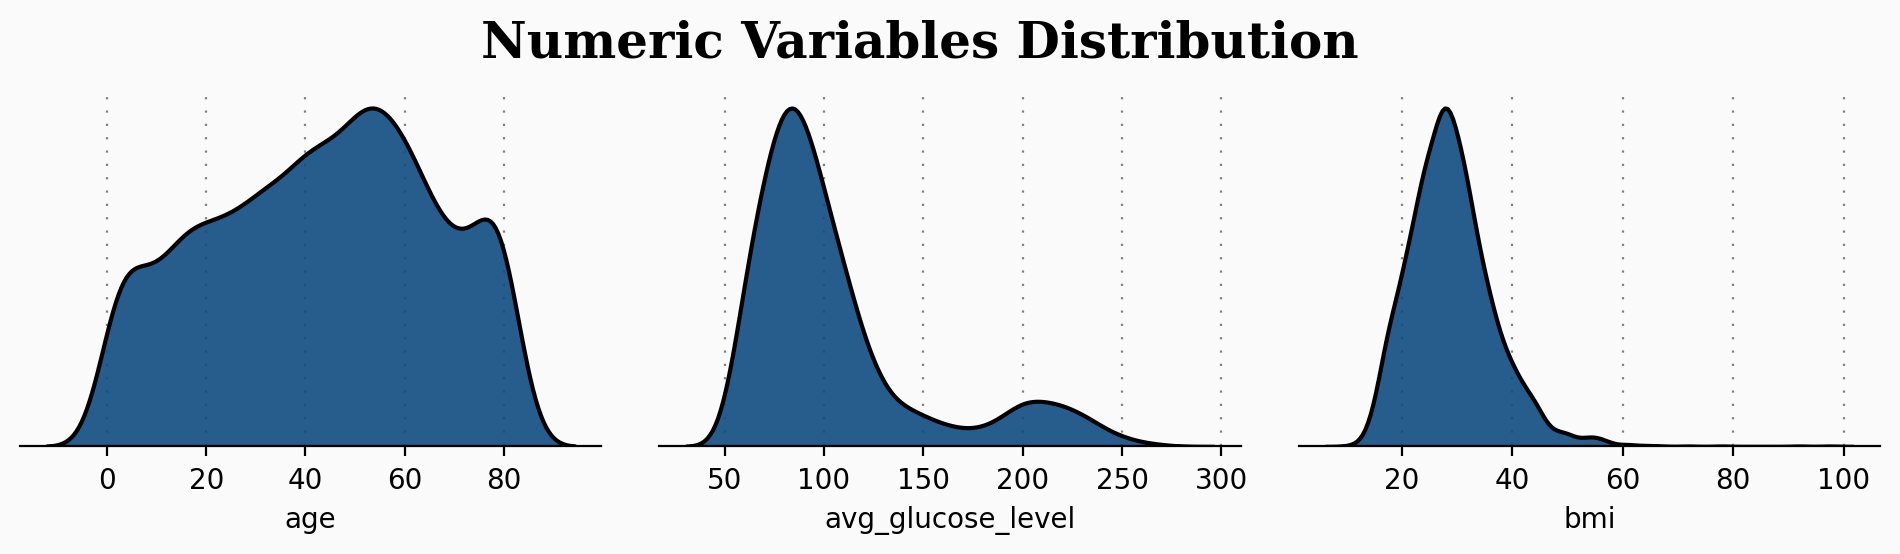

In [11]:
fig = plt.figure(figsize=(12, 12), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

axes = []
for col in range(0, 3):
    ax = fig.add_subplot(gs[0, col])
    ax.set_facecolor("#fafafa")
    ax.tick_params(axis="y", left=False)
    ax.get_yaxis().set_visible(False)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
    axes.append(ax)

for ax, variable in zip(axes, conts):
    sns.kdeplot(
        df[variable],
        ax=ax,
        color="#0F4C81",
        fill=True,
        linewidth=1.5,
        ec="black",
        alpha=0.9,
        zorder=3,
        legend=False,
    )
    ax.grid(
        which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5)
    )

fig.suptitle(
    "Numeric Variables Distribution",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    y=0.91,
)

For now, we have a clear understanding of **data distribution**, but we can add more information to this plot. Let’s look at the different distributions for people with and without `stroke`.

Text(0.5, 0.91, 'Numeric Variables by Stroke & No Stroke')

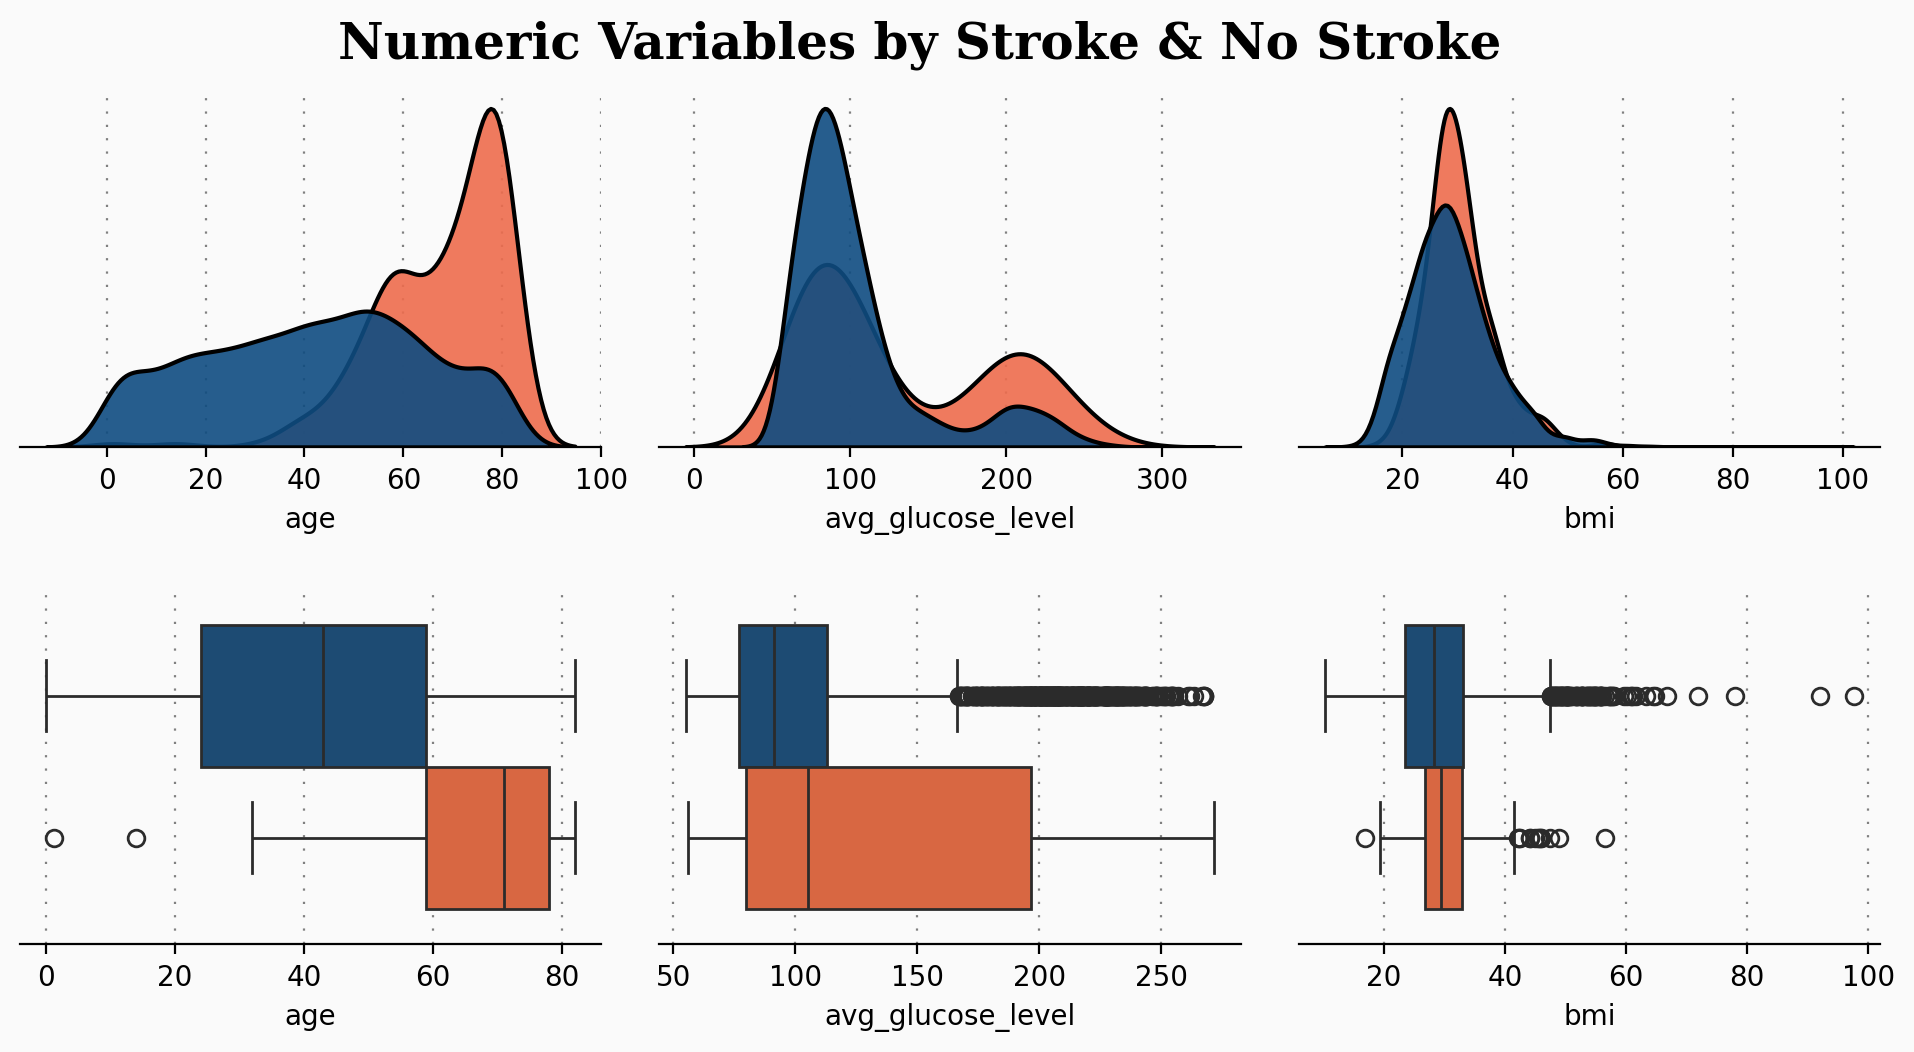

In [12]:
fig = plt.figure(figsize=(12, 12), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

axes = []
for col in range(0, 3):
    ax = fig.add_subplot(gs[0, col])
    ax.set_facecolor("#fafafa")
    ax.tick_params(axis="y", left=False)
    ax.get_yaxis().set_visible(False)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
    axes.append(ax)

stroke = df[df["stroke"] == 1]
no_stroke = df[df["stroke"] == 0]

for ax, variable in zip(axes, conts):
    sns.kdeplot(
        stroke[variable],
        ax=ax,
        color="#EE6C4D",
        fill=True,
        linewidth=1.5,
        ec="black",
        alpha=0.9,
        zorder=3,
        legend=False,
    )
    sns.kdeplot(
        no_stroke[variable],
        ax=ax,
        color="#0F4C81",
        fill=True,
        linewidth=1.5,
        ec="black",
        alpha=0.9,
        zorder=3,
        legend=False,
    )
    ax.grid(
        which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5)
    )

#

axes = []
for col in range(0, 3):
    ax = fig.add_subplot(gs[1, col])
    ax.set_facecolor("#fafafa")
    ax.tick_params(axis="y", left=False)
    ax.get_yaxis().set_visible(False)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
    axes.append(ax)

for ax, variable in zip(axes, conts):
    sns.boxplot(data=df, x=variable, hue="stroke", ax=ax, palette=palette, legend=False)
    ax.grid(
        which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5)
    )

fig.suptitle(
    "Numeric Variables by Stroke & No Stroke",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    y=0.91,
)

First of all, I will remove outliers from both DataFrames to train the future model with more accurate data:
1) `BMI > 40` is considered **obesity**, while `BMI > 60` is considered **abnormal**. Therefore, I will remove these values.  
2) `Strokes at ages 1 and 14` are extremely rare, so these values would only create noise in the data.  
3) However, `avg_glucose_level` will remain untouched, since all of these values could realistically occur in real life.

In [13]:
df = df.drop(df[df["bmi"] >= 60].index)
ml_df = ml_df.drop(df[df["bmi"] >= 60].index)

df = df.drop(df[(df["age"] <= 20) & (df["stroke"] == 1)].index)
ml_df = ml_df.drop(df[(df["age"] <= 20) & (df["stroke"] == 1)].index)

According to our plots, `age` is a strong predictor of `stroke` presence. We can also see that a high `avg_glucose_level` is strongly associated with stroke presence. `bmi` shows limited predictive value, as it is concentrated around the same point ($\approx 30$) for both those who had a stroke and those who did not.  

To gain more detailed insights into the correlations among these three features, I used the **Mann-Whitney U test** and **Rank-biserial correlation**.


### Mann–Whitney U test and Rank-biserial correlation

These methods are straight from **Statistics**. We use Mann-Whitney U to:
- Check the **chances** of data being **random and not affecting stroke**, which is `p-value`
- Check the **strength of effect**, which is $r_{rb}$

$$
U = n_1 n_2 + \frac{n_1(n_1+1)}{2} - R_1
$$

where:  
- $n_1, n_2$ — sample sizes,  
- $R_1$ — sum of ranks for the first group.

---

p-value with normal approximation:

$$
z = \frac{U - \mu_U}{\sigma_U}, \quad 
\mu_U = \frac{n_1 n_2}{2}, \quad
\sigma_U = \sqrt{\frac{n_1 n_2 (n_1 + n_2 + 1)}{12}}
$$

---

$r_{rb}$ via $U$:

$$
r_{rb} = 1 - \frac{2U}{n_1 n_2}
$$

where:  
- $U$ — Mann–Whitney statistic. 

In [14]:
from scipy.stats import mannwhitneyu

# age
x, y = df[df.stroke == 0]["age"], df[df.stroke == 1]["age"]
stat, p = mannwhitneyu(x, y)
r_rb = 1 - (2 * stat) / (len(x) * len(y))
print(f"Age: U={stat}, p-value={p:.5f}, r_rb={r_rb:.3f}")

# avg_glucose_level
x, y = df[df.stroke == 0]["avg_glucose_level"], df[df.stroke == 1]["avg_glucose_level"]
stat, p = mannwhitneyu(x, y)
r_rb = 1 - (2 * stat) / (len(x) * len(y))
print(f"Glucose: U={stat}, p-value={p:.5f}, r_rb={r_rb:.3f}")

# bmi
x, y = df[df.stroke == 0]["bmi"], df[df.stroke == 1]["bmi"]
stat, p = mannwhitneyu(x, y)
r_rb = 1 - (2 * stat) / (len(x) * len(y))
print(f"BMI: U={stat}, p-value={p:.5f}, r_rb={r_rb:.3f}")

Age: U=191027.5, p-value=0.00000, r_rb=0.681
Glucose: U=461296.5, p-value=0.00000, r_rb=0.230
BMI: U=507599.5, p-value=0.00005, r_rb=0.152


- $r_{rb} \approx 0$ — almost no difference.  
- $|r_{rb}| = 0.1$ — small effect.  
- $|r_{rb}| = 0.3$ — medium effect.  
- $|r_{rb}| = 0.5$ or higher — strong effect.

$r_{rb}$ values showed that `age` is a strongest numerical factor to predict a **stroke presence**, while `avg_glucose_level` and `bmi` are **way weaker**.

Let's check risks of getting a stroke, depending on `age`.

### Analysing risks

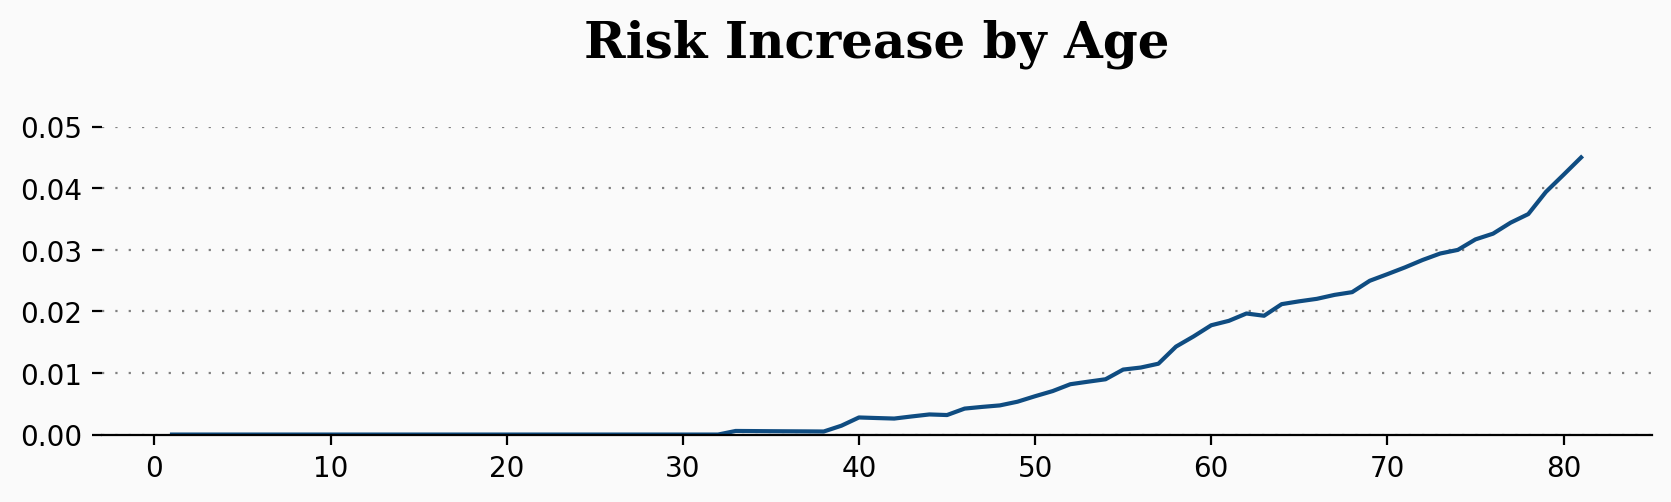

In [15]:
fig = plt.figure(figsize=(10, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.10, hspace=0.5)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor("#fafafa")

df["age"] = df["age"].astype(int)

rate = []
for i in range(df["age"].min(), df["age"].max()):
    rate.append(df[df["age"] < i]["stroke"].sum() / len(df[df["age"] < i]["stroke"]))

sns.lineplot(data=rate, color="#0f4c81", ax=ax)

ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))
ax.set_ylim(0, 0.05)

for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)

ax.set_title(
    "Risk Increase by Age",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

Now, you might notice that the risk does not rise above 0.05. This is because people who had a stroke make up only $\approx5$% of our DataFrame, which means the dataset is **imbalanced**.

### Analysing the Balance of target.

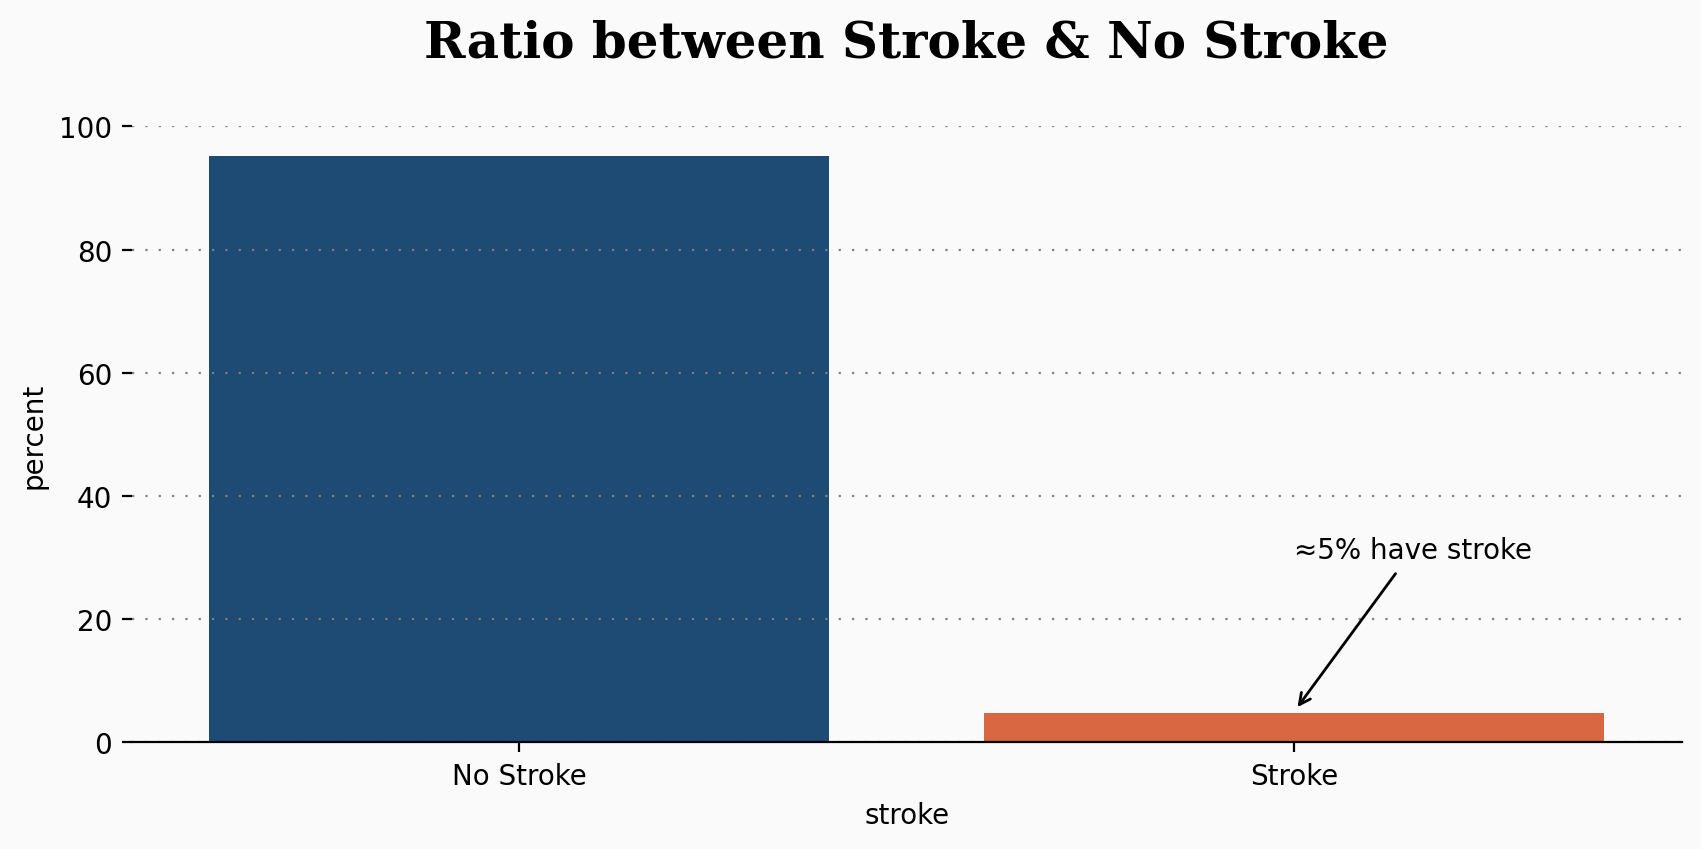

In [16]:
fig = plt.figure(figsize=(10, 10), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.10, hspace=0.5)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor("#fafafa")

sns.countplot(
    data=df,
    x="stroke",
    color="#0f4c81",
    ax=ax,
    stat="percent",
    palette=palette,
    hue="stroke",
)

ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))
ax.set_ylim(0, 100)
ax.set_xticklabels(["No Stroke", "Stroke"])
ax.legend_.remove()

ax.annotate(
    "≈5% have stroke",
    xy=(1, 5),
    xytext=(1, 30),
    arrowprops=dict(arrowstyle="->", color="black"),
)

for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)

ax.set_title(
    "Ratio between Stroke & No Stroke",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

After the **data exploration**, we will need to address the imbalance so the model can learn more effectively.

## Exploring the Data. Categorical Variable.

In this step, I will analyze and compare categories with **numerical ariables**, since they have a significant impact on `stroke` outcomes.

### Gender and Marriage.

In [17]:
# df['gender'].value_counts()

First, I will analyze the `gender` and `ever_married` columns. Before we begin, I need to highlight one important detail about `gender`. The gender feature has 3 unique values:

- Male (2994 samples)  
- Female (2115 samples)  
- *Other (only 1 sample)*  

To make the graph easier to read, I will remove this sample from the visualization. However, I will still show its features:

In [18]:
df[df["gender"] == "Other"]

id gender  age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other   26             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0

In this dataset, there is only **one** person with `gender == "Other"`, and this case belongs to the majority class (`stroke = 0`). This situation introduces **two** main issues:

1) **No representation** – the model cannot learn any meaningful pattern for this category from just a single instance.  

2) **Synthetic bias** – if we apply oversampling techniques such as `SMOTENC`, this single record would be replicated many times, creating an artificial subgroup of perfectly healthy `"Other"` individuals. This could mislead the model into thinking that the `"Other"` gender is strongly associated with *not having a stroke.*  

For this reason, **I will remove this case** before training to avoid introducing bias.

In [19]:
df = df.drop(3116)

In [20]:
ml_df = ml_df.drop("gender_Other", axis=1)
ml_df = ml_df.drop(3116)

In [21]:
gender_counts = (
    df[df["gender"] != "Other"].groupby("gender")["stroke"].value_counts(normalize=True)
    * 100
)
gender_counts = gender_counts.rename("percentage").reset_index()
gender_counts["stroke"] = gender_counts["stroke"].map({0: "No Stroke", 1: "Stroke"})

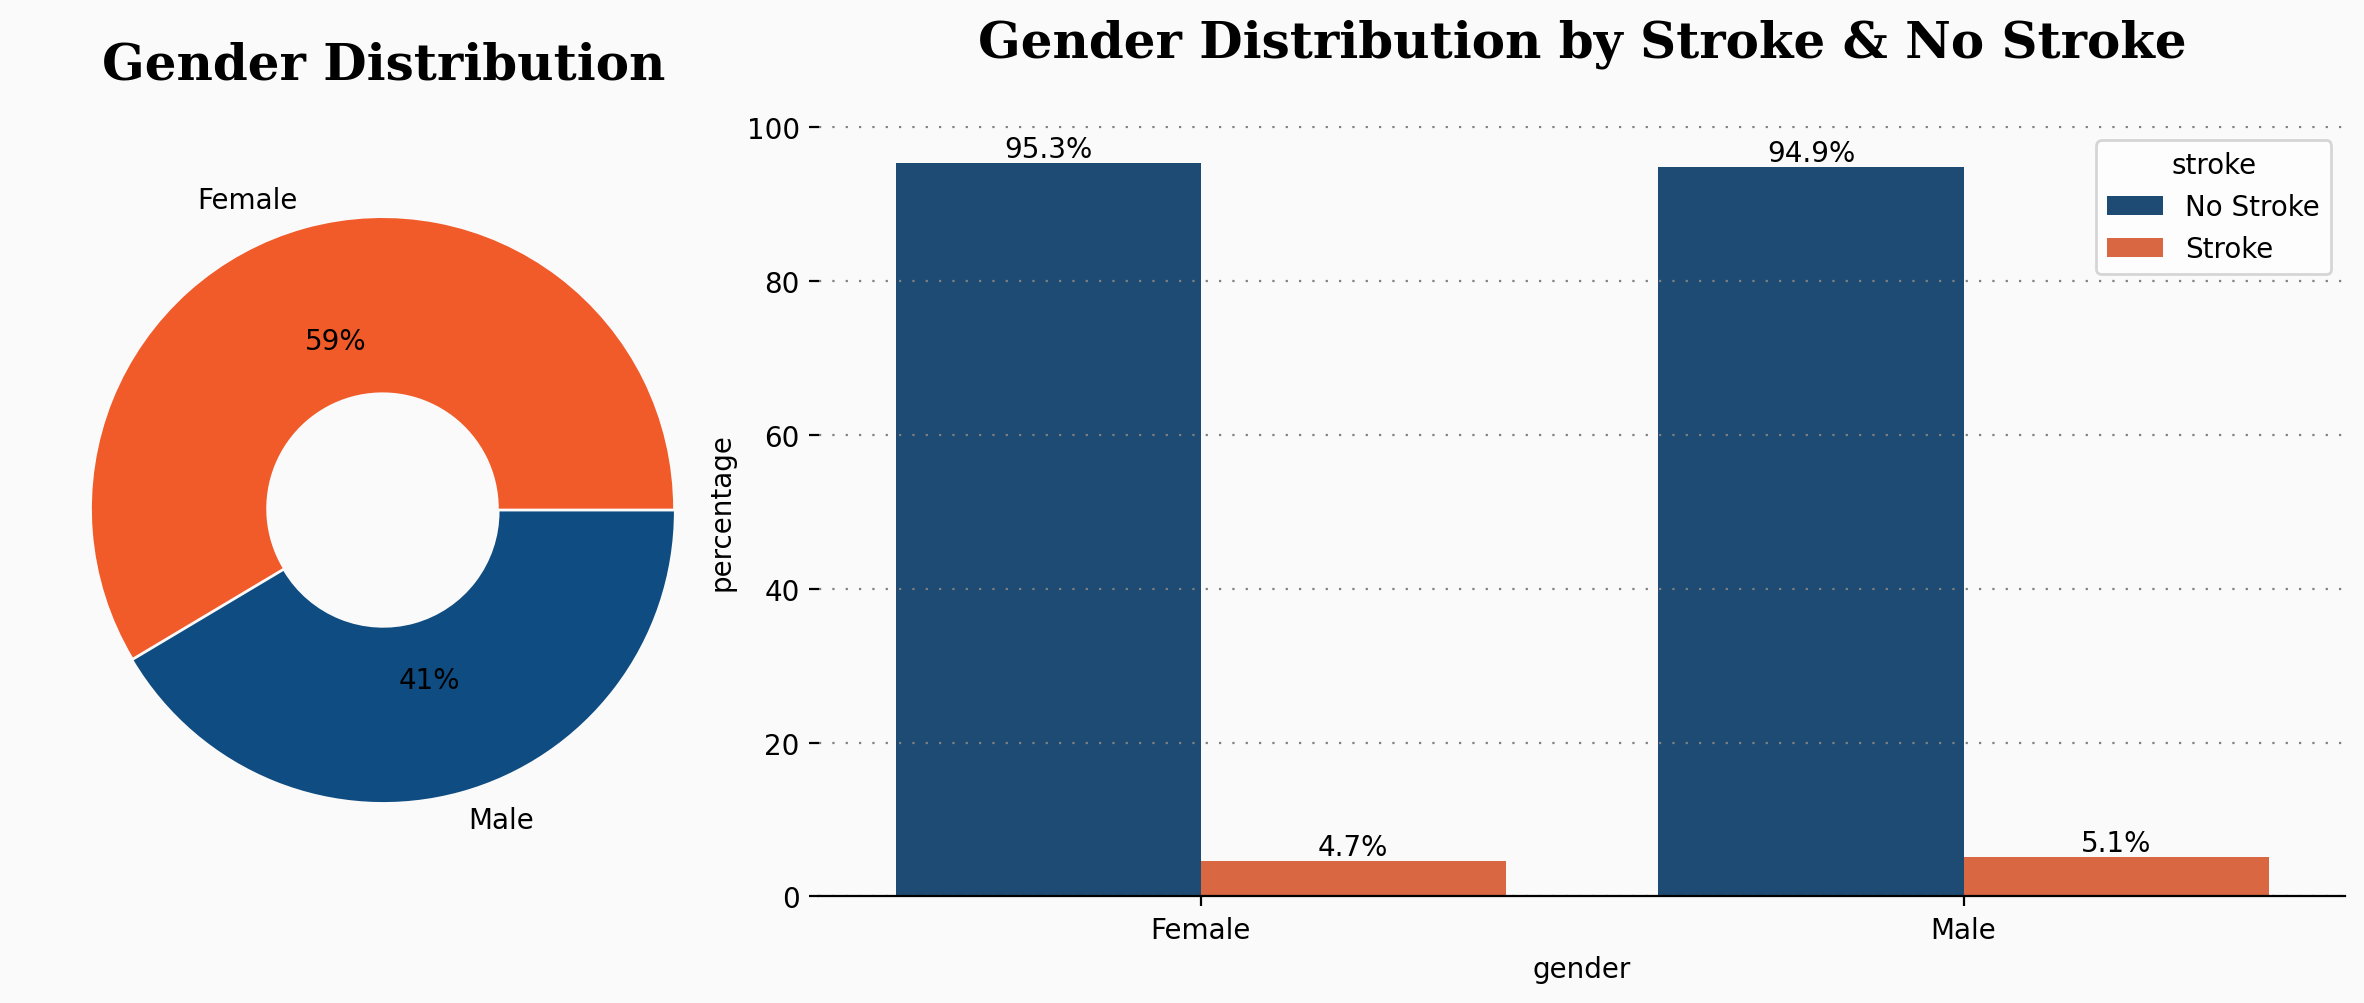

In [22]:
fig = plt.figure(figsize=(15, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.10, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#fafafa")

gender = df.value_counts("gender")
explode = [0.01, 0]

ax0.pie(
    x=gender,
    labels=["Female", "Male"],
    colors=["#f15a29", "#0f4c81"],
    normalize=True,
    explode=explode,
    autopct="%.0f%%",
    wedgeprops=dict(width=0.6),
)

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

ax0.set_title(
    "Gender Distribution",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

# ------------------------------------------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(gs[0, 1:])
ax1.set_facecolor("#fafafa")

sns.barplot(
    data=gender_counts,
    x="gender",
    y="percentage",
    palette=palette,
    hue="stroke",
    ax=ax1,
)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))

for s in ["top", "right", "left"]:
    ax1.spines[s].set_visible(False)

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10)

ax1.set_title(
    "Gender Distribution by Stroke & No Stroke",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

The data does not show a significant difference between genders in predicting `stroke`. **4.7% of females** and **5.1% of males** in this dataset had a stroke.

In [23]:
marriage_counts = (
    df.groupby("ever_married")["stroke"].value_counts(normalize=True) * 100
)
marriage_counts = marriage_counts.rename("percentage").reset_index()
marriage_counts["stroke"] = marriage_counts["stroke"].map({0: "No Stroke", 1: "Stroke"})

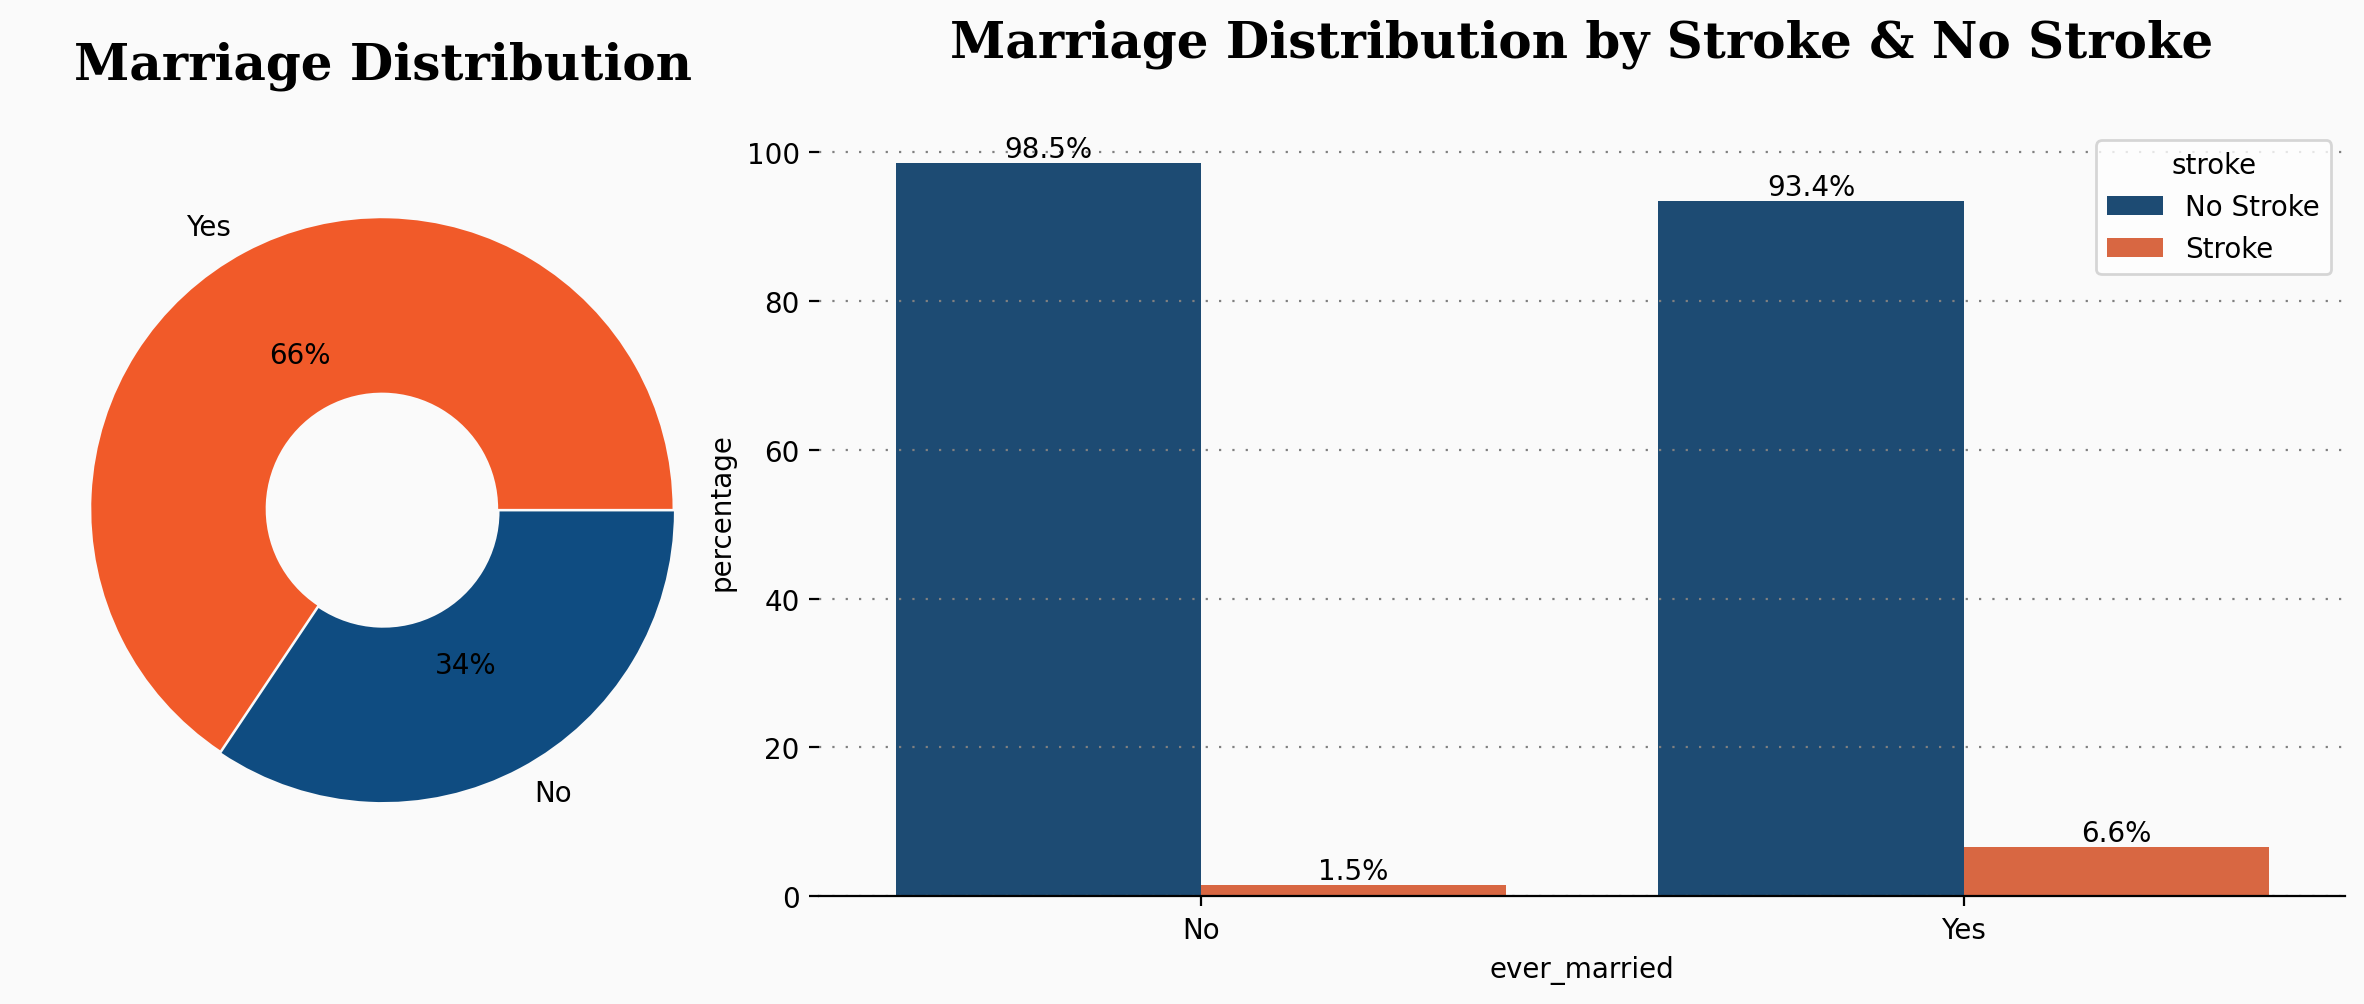

In [24]:
fig = plt.figure(figsize=(15, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.10, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#fafafa")

marriage = df.value_counts("ever_married")
explode = [0.01, 0]

ax0.pie(
    x=marriage,
    labels=["Yes", "No"],
    colors=["#f15a29", "#0f4c81"],
    normalize=True,
    explode=explode,
    autopct="%.0f%%",
    wedgeprops=dict(width=0.6),
)

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

ax0.set_title(
    "Marriage Distribution",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

# ------------------------------------------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(gs[0, 1:])
ax1.set_facecolor("#fafafa")

sns.barplot(
    data=marriage_counts,
    x="ever_married",
    y="percentage",
    palette=palette,
    hue="stroke",
    ax=ax1,
)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))

for s in ["top", "right", "left"]:
    ax1.spines[s].set_visible(False)

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10)

ax1.set_title(
    "Marriage Distribution by Stroke & No Stroke",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

It appears that people who have never been married are **less likely** to experience a stroke: only **1.7% among the non-married** compared to **6.6% among married** individuals.  

This observation suggests that the variable `ever_married` may primarily serve as a **proxy for age**, rather than having an independent effect. After all, the likelihood of being married naturally increases with age. Let’s take a closer look.

Text(0.5, 1, 'Ever_Married by Age')

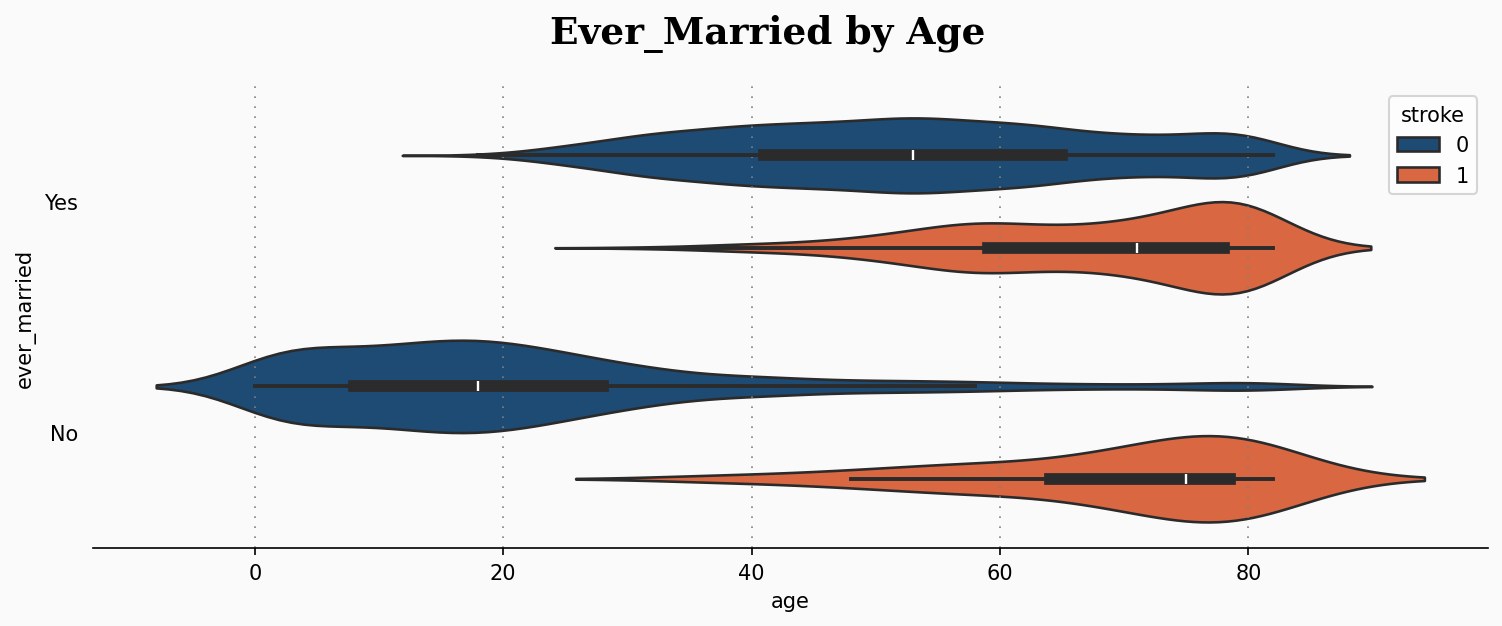

In [25]:
fig = plt.figure(figsize=(12, 4), dpi=150, facecolor="#fafafa")
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.1, hspace=0.4)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#fafafa")
ax0.tick_params(axis="y", left=False)

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

sns.violinplot(
    data=df,
    x="age",
    y="ever_married",
    ax=ax0,
    palette=palette,
    hue="stroke",
    legend=True,
)

ax0.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5))

fig.suptitle(
    "Ever_Married by Age", fontsize=18, fontfamily="serif", fontweight="bold", y=1
)

As you can see, `ever_married` is simply **binning** the `age` feature. However, the outliers in `ever_married == "No"` make it even harder for the model to learn effectively.

In my opinion, females are more likely to be married than males. I suggest we take a look at the data to test this hypothesis.

In [26]:
marriage_counts = (
    df.groupby("ever_married")["gender"].value_counts(normalize=True) * 100
)
marriage_counts = marriage_counts.rename("percentage").reset_index()

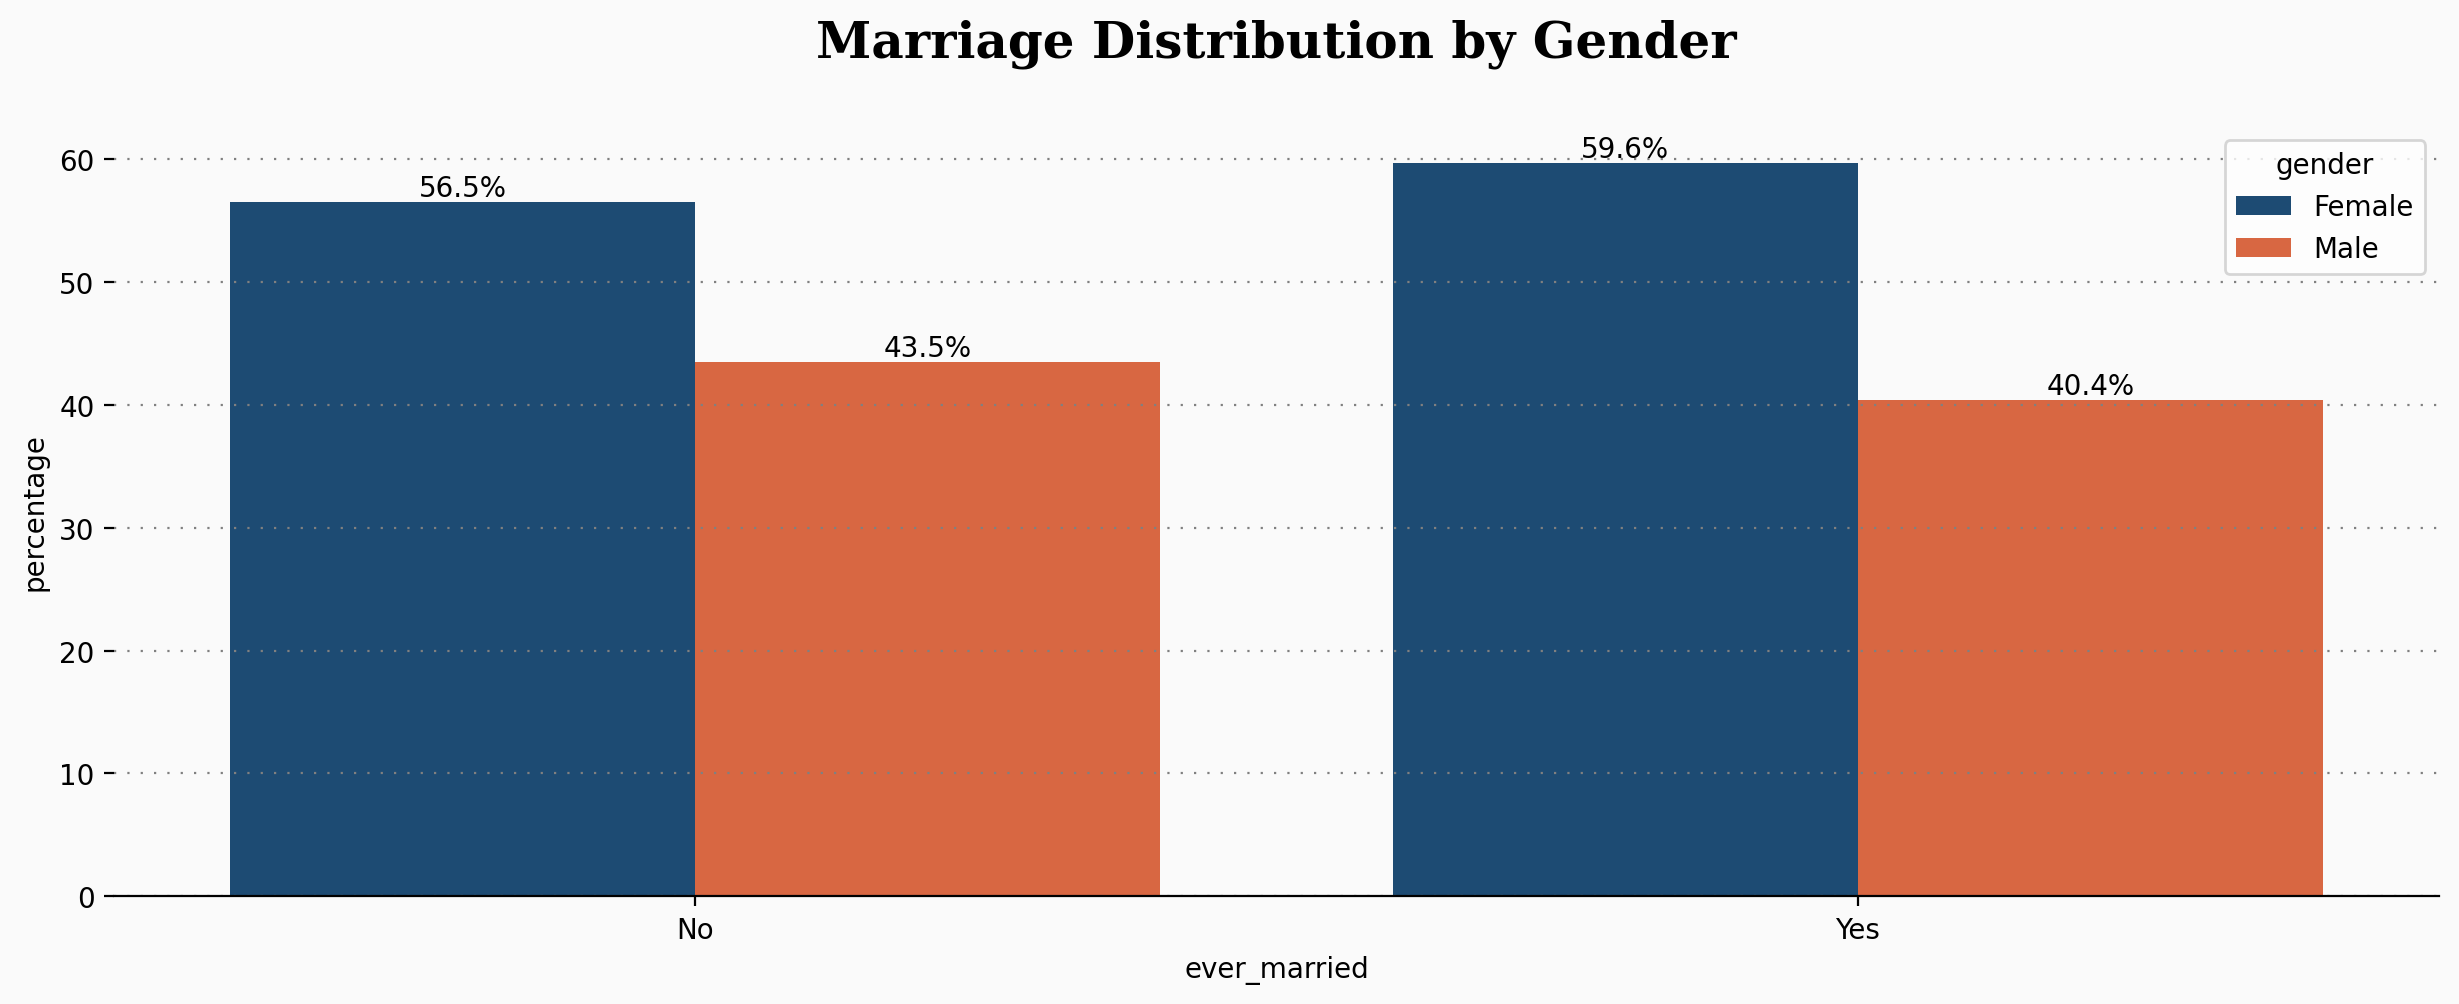

In [27]:
fig = plt.figure(figsize=(15, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.10, hspace=0.5)

ax = fig.add_subplot(gs[0, :])
ax.set_facecolor("#fafafa")

sns.barplot(
    data=marriage_counts,
    x="ever_married",
    y="percentage",
    palette=palette,
    hue="gender",
    ax=ax,
)

ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))

for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10)

ax.set_title(
    "Marriage Distribution by Gender",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

We can see, that **females** are $\approx 3$% more likely to be married than **males**. However, it is apparent that there is almost no difference between 2 genders in marriage history.

Okay, let's move to **health stats**,  such as `hypertension`, `heart_disease`, and `smoking_status`

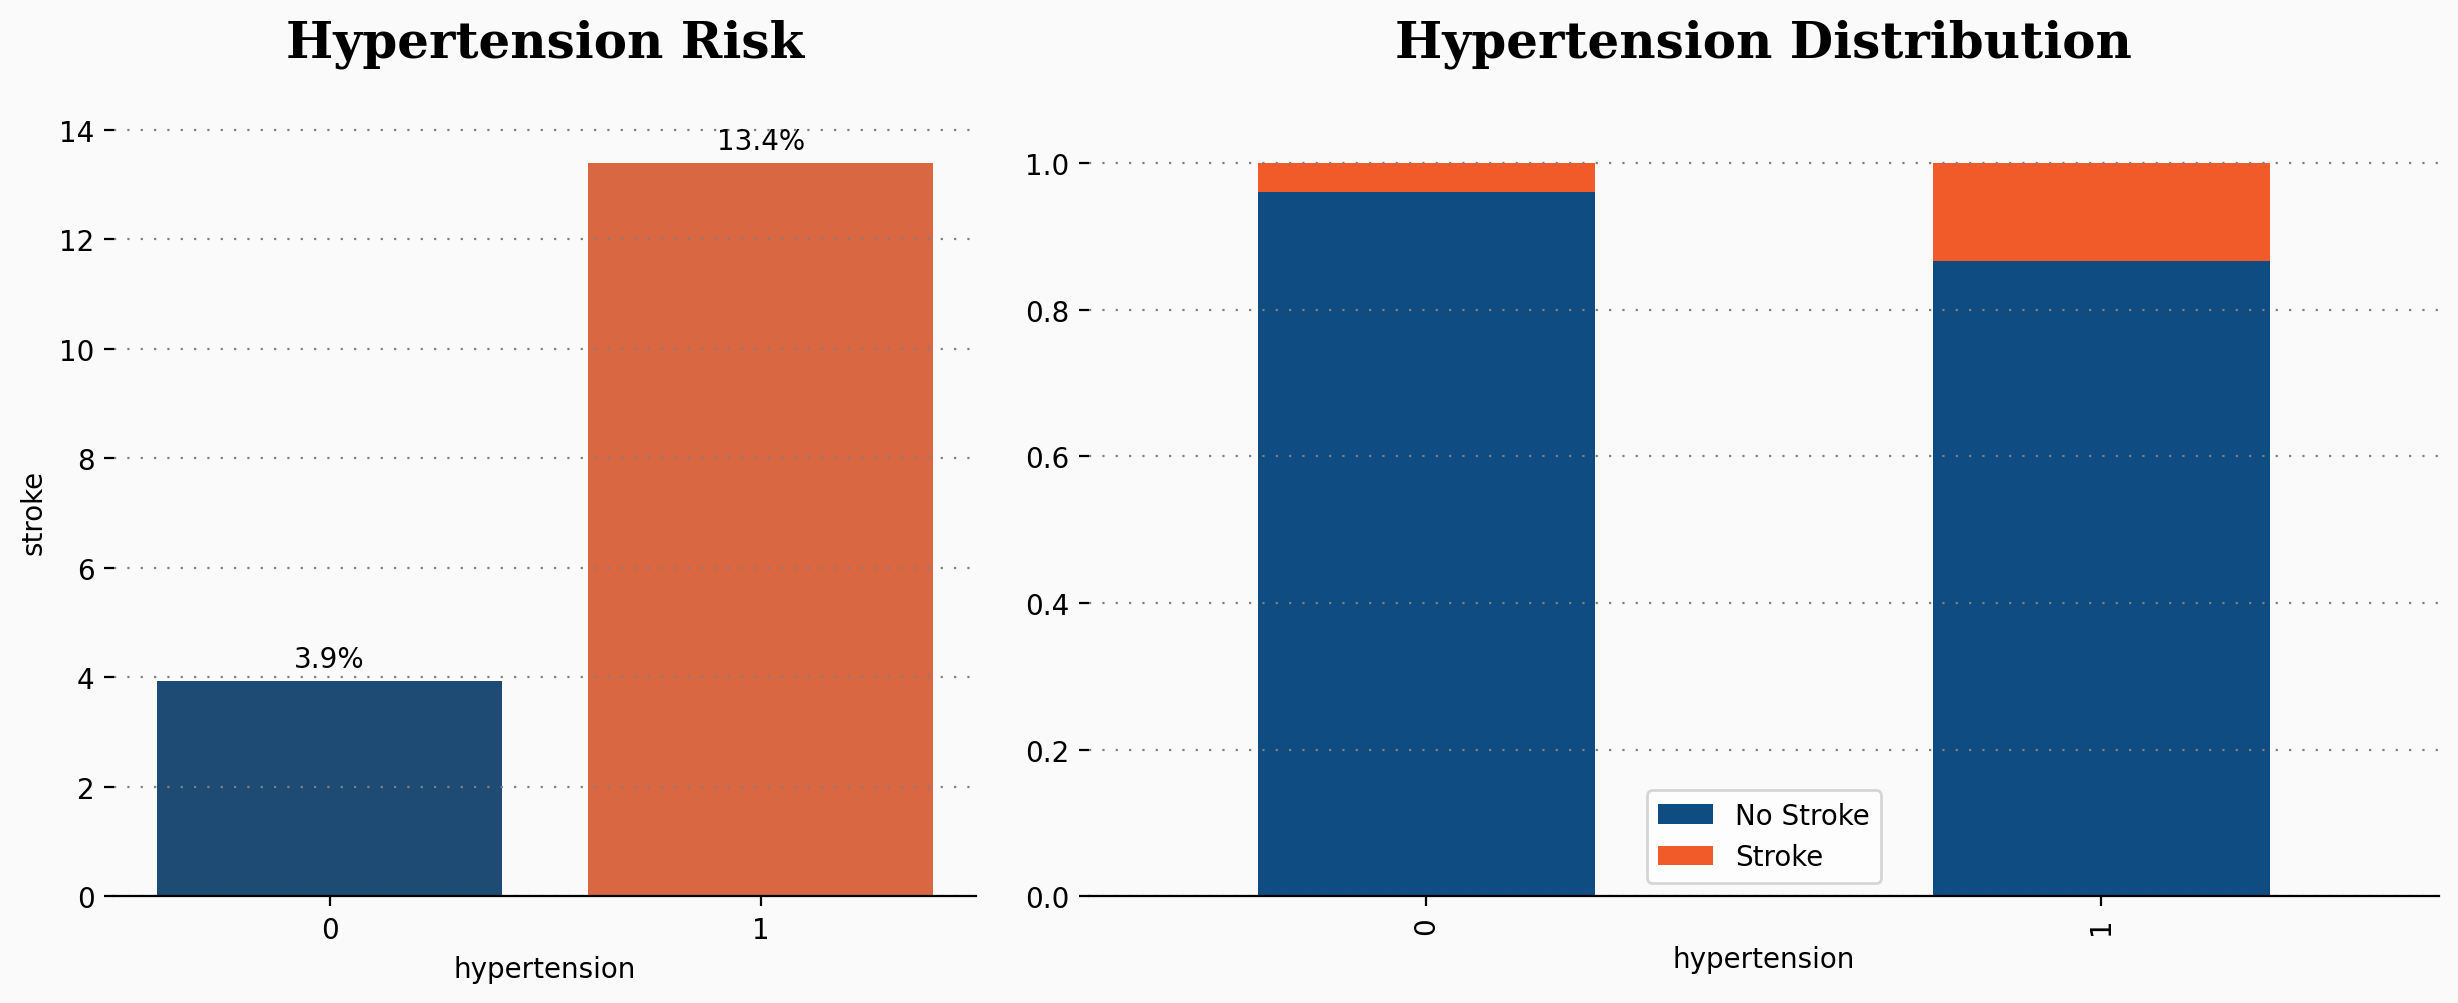

In [28]:
fig = plt.figure(figsize=(15, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(1, 5)
gs.update(wspace=0.30, hspace=0.5)

ax0 = fig.add_subplot(gs[0, :2])
ax0.set_facecolor("#fafafa")

prop_df = (
    df.groupby("hypertension")["stroke"].apply(lambda x: x.mean() * 100).reset_index()
)

sns.barplot(
    data=prop_df,
    x="hypertension",
    y="stroke",
    palette=palette,
    legend=False,
    hue="hypertension",
)

ax0.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

for container in ax0.containers:
    ax0.bar_label(container, fmt="%.1f%%", padding=3)

ax0.set_title(
    "Hypertension Risk",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

# ------------------------------------------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(gs[0, 2:])
ax1.set_facecolor("#fafafa")

ctab = pd.crosstab(df["hypertension"], df["stroke"], normalize="index")
ctab.plot(kind="bar", stacked=True, color=["#0f4c81", "#f15a29"], ax=ax1)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))
ax1.legend(["No Stroke", "Stroke"])

for s in ["top", "right", "left"]:
    ax1.spines[s].set_visible(False)

ax1.set_title(
    "Hypertension Distribution",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

The plot above illustrates that people with `hypertension` **are more likely** to suffer from stroke, rather than ones without it.

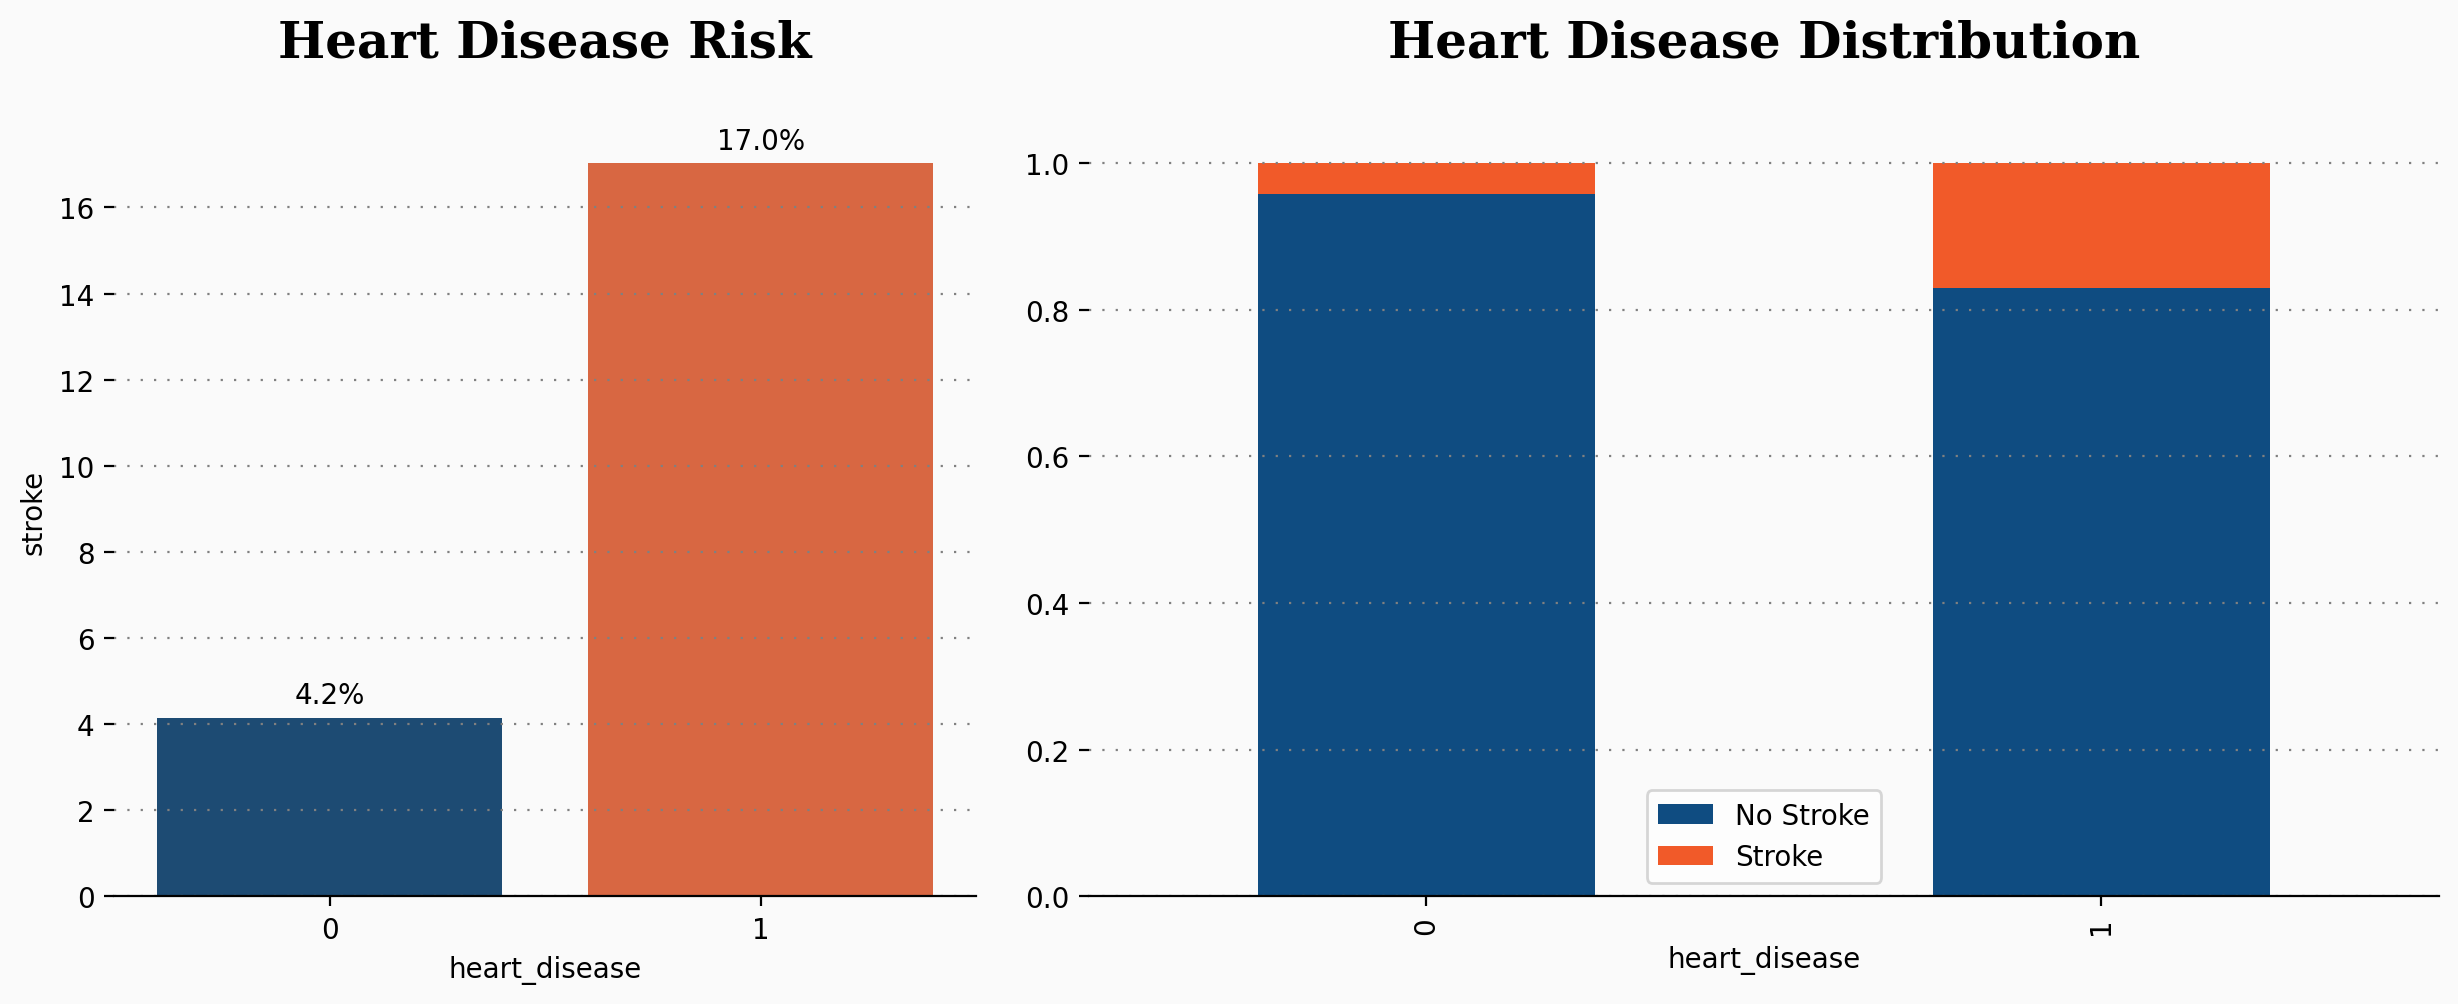

In [29]:
fig = plt.figure(figsize=(15, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(1, 5)
gs.update(wspace=0.30, hspace=0.5)

ax0 = fig.add_subplot(gs[0, :2])
ax0.set_facecolor("#fafafa")

prop_df = (
    df.groupby("heart_disease")["stroke"].apply(lambda x: x.mean() * 100).reset_index()
)

sns.barplot(
    data=prop_df,
    x="heart_disease",
    y="stroke",
    palette=palette,
    legend=False,
    hue="heart_disease",
)

ax0.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

for container in ax0.containers:
    ax0.bar_label(container, fmt="%.1f%%", padding=3)

ax0.set_title(
    "Heart Disease Risk",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

# ------------------------------------------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(gs[0, 2:])
ax1.set_facecolor("#fafafa")

ctab = pd.crosstab(df["heart_disease"], df["stroke"], normalize="index")
ctab.plot(kind="bar", stacked=True, color=["#0f4c81", "#f15a29"], ax=ax1)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))
ax1.legend(["No Stroke", "Stroke"])

for s in ["top", "right", "left"]:
    ax1.spines[s].set_visible(False)

ax1.set_title(
    "Heart Disease Distribution",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

It seems like `heart_disease` is copying `hypertension`. To test their dependence, we apply the $\chi^2$ and measure the strength of association with Cramér’s $V$

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

$$
\text{where } O \text{ — observed frequencies, } 
E \text{ — expected frequencies under independence.}
$$

$$
df = (r - 1) * (c - 1)
$$

$$
r \text{- row number, }  c \text{ - column number}
$$

$$
p\text{-value} = P\big(\chi^2_{df} \geq \chi^2_{\text{obs.}}\big) 
= 1 - F_{\chi^2_{df}}\!\left(\chi^2_{\text{obs.}}\right)
$$

**Decision rule:**
- if $p$ $<$  0.05 → significant dependence (variables might be correlated)
- if $p$ $\geq$ 0.05 → fail to reject independence

In [30]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["hypertension"], df["heart_disease"])
chi2, p, dof, ex = chi2_contingency(table)
print("Chi2 =", chi2, "p-value =", p)

Chi2 = 59.30997191682104 p-value = 1.3469226462287617e-14


Our `p-value` is extremely low, which means that data **might be copied**. Now, to prove it completely, we need to calculate Cramér’s $V$.

$$
V = \sqrt{\frac{\chi^2}{n \cdot (k - 1)}}
$$

where
- $\chi^2$ $-$ chi-squared statistic
- $n$ $-$ total number of observarions
- $k$ $-$ the smaller dimension of the contingency table.

Based on $\chi^2$ we can calculate this value. In short, $V$ shows value from 0 to 1, that represents the **power of dependency**. 

Although thresholds are not strict, they are often interpreted as:
- $V \approx 0.1$ → Low dependecy
- $V \approx 0.3$ → Moderate dependency
- $V \approx 0.5$ → High dependency

In [31]:
table = pd.crosstab(df["heart_disease"], df["hypertension"])

chi2, p, dof, expected = chi2_contingency(table)

n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

print("Cramér’s V:", cramers_v)

Cramér’s V: 0.10790321602086053


For the first time it might be confusing. Why do we have really low `p-value`, but $V$ shows absolutely different result?

Answer is simple:
1) `p-value` said that hypertension **might have relation with** `heart_disease`
2) To prove it, we calculated Cramér’s $V$.
3) As the result shows ($V = 0.10$), the association is extremely weak, meaning that even though the data is not random, the relationship is not meaningful in practice.

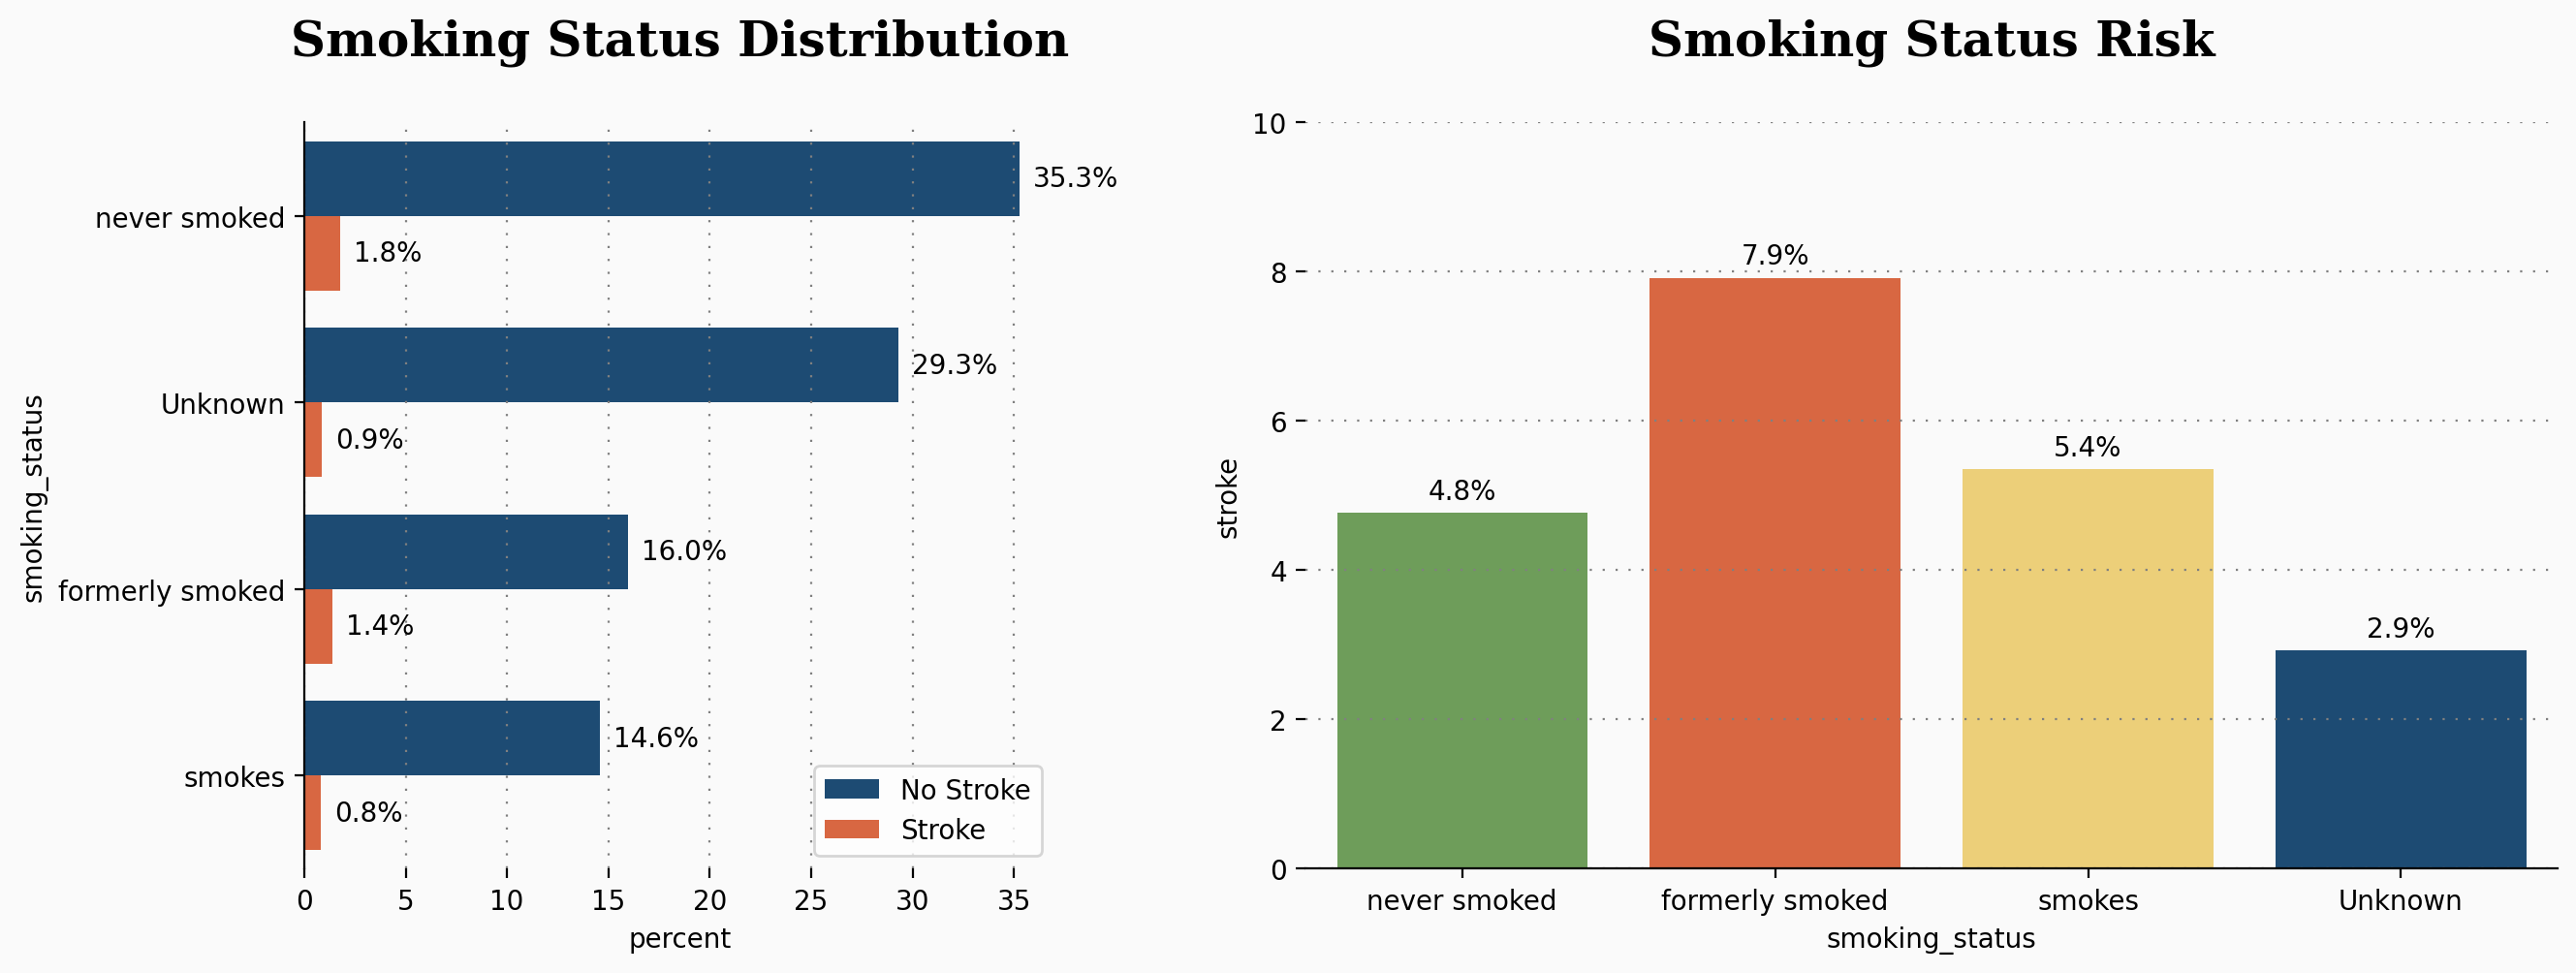

In [32]:
fig = plt.figure(figsize=(15, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(1, 5)
gs.update(wspace=1, hspace=0.5)

ax0 = fig.add_subplot(gs[0, :2])
ax0.set_facecolor("#fafafa")

sns.countplot(
    data=df,
    y="smoking_status",
    stat="percent",
    order=df["smoking_status"].value_counts().index,
    palette=palette,
    hue="stroke",
    ax=ax0,
)

for container in ax0.containers:
    ax0.bar_label(container, fmt="%.1f%%", label_type="edge", padding=5)

ax0.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5))
ax0.legend(["No Stroke", "Stroke"])

for s in ["top", "right", "bottom"]:
    ax0.spines[s].set_visible(False)

ax0.set_title(
    "Smoking Status Distribution",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

# ------------------------------------------------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(gs[0, 2:])
ax1.set_facecolor("#fafafa")

prop_df = (
    df.groupby("smoking_status")["stroke"].apply(lambda x: x.mean() * 100).reset_index()
)

sns.barplot(
    data=prop_df,
    x="smoking_status",
    y="stroke",
    palette=palette,
    hue="smoking_status",
    order=["never smoked", "formerly smoked", "smokes", "Unknown"],
    ax=ax1,
)

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f%%", padding=3)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))
ax1.set_ylim(0, 10)

for s in ["top", "right", "left"]:
    ax1.spines[s].set_visible(False)

ax1.set_title(
    "Smoking Status Risk",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

Unfortunately, `smoking_status` does not provide sufficient information to draw reliable conclusions. 

For example, while 7.9% of stroke cases are associated with people who `formerly smoked`, the dataset lacks critical details such as the duration and intensity of smoking. 

A person who tried smoking once is treated **the same** as someone who smoked heavily for decades, which makes this feature **highly ambiguous**.

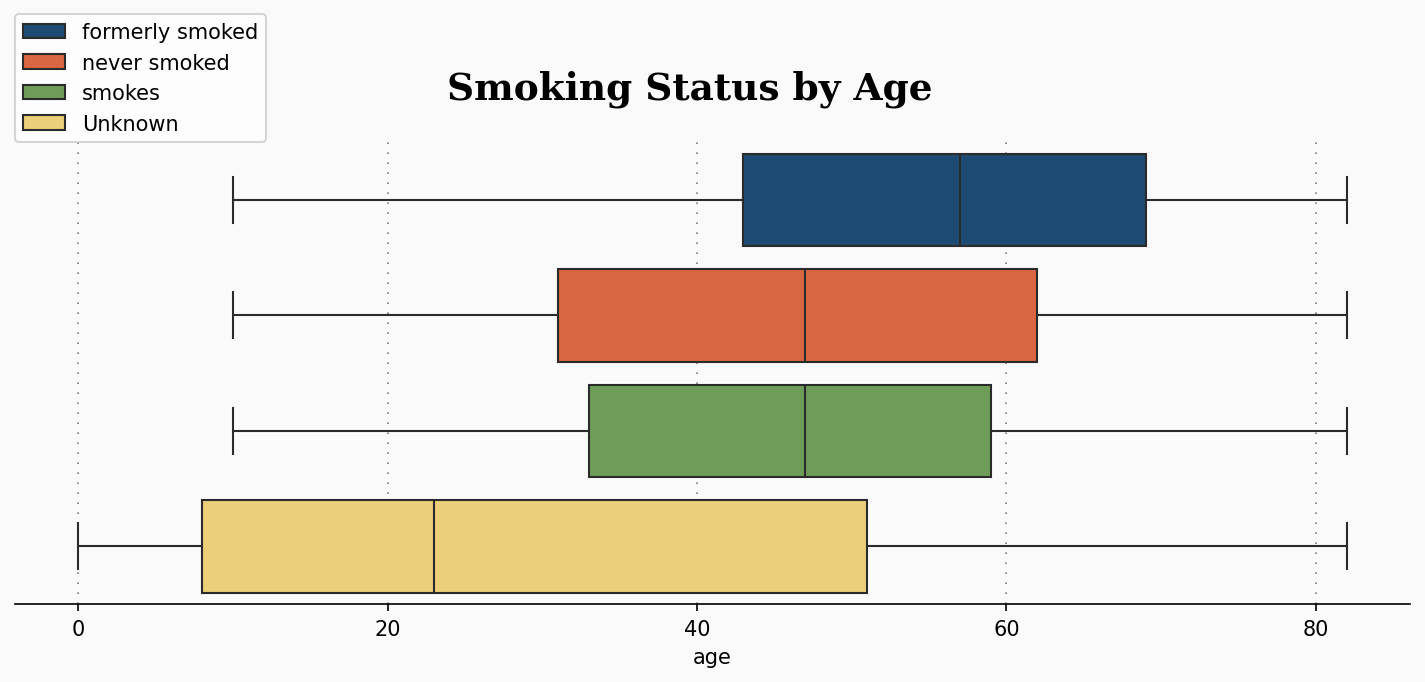

In [33]:
# box-plot or violin-plot for age_marriage distribution
fig = plt.figure(figsize=(12, 4), dpi=150, facecolor="#fafafa")
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.1, hspace=0.4)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#fafafa")
ax0.tick_params(axis="y", left=False)
ax0.get_yaxis().set_visible(False)

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

sns.boxplot(
    data=df,
    x="age",
    y="smoking_status",
    ax=ax0,
    palette=palette,
    hue="smoking_status",
    legend=True,
)

ax0.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5))

fig.suptitle(
    "Smoking Status by Age", fontsize=18, fontfamily="serif", fontweight="bold", y=1
)

plt.legend(loc=(0, 1))

2 features left:
1) `work_type`
2) `Residence_type`

Text(0.5, 1.0, 'Work Type Distribution')

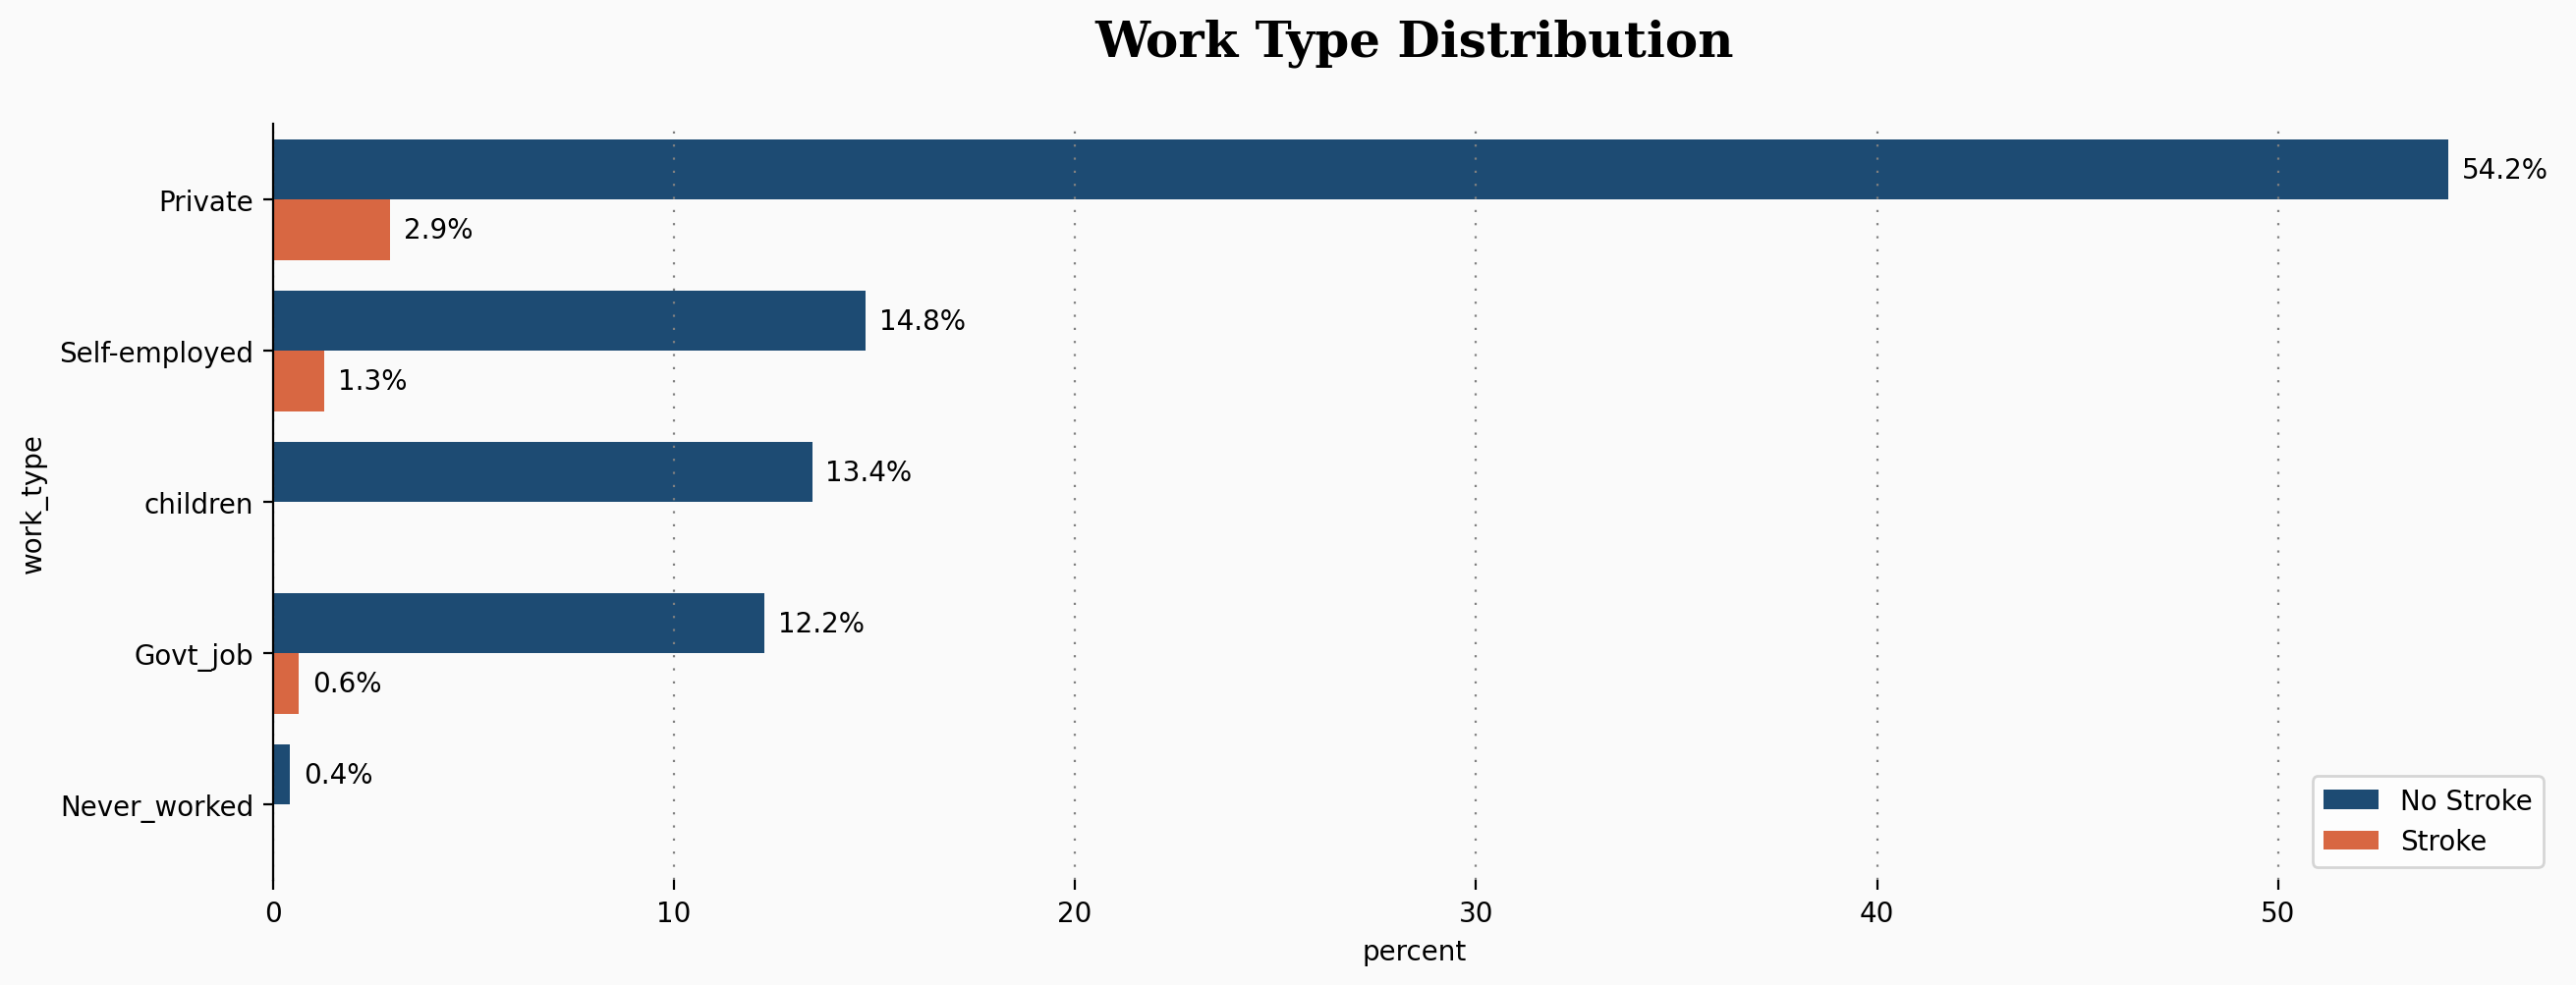

In [34]:
fig = plt.figure(figsize=(15, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(1, 5)
gs.update(wspace=1, hspace=0.5)

ax0 = fig.add_subplot(gs[0, :])
ax0.set_facecolor("#fafafa")

sns.countplot(
    data=df,
    y="work_type",
    stat="percent",
    order=df["work_type"].value_counts().index,
    palette=palette,
    hue="stroke",
    ax=ax0,
)

for container in ax0.containers:
    ax0.bar_label(container, fmt="%.1f%%", label_type="edge", padding=5)

ax0.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5))
ax0.legend(["No Stroke", "Stroke"])

for s in ["top", "right", "bottom"]:
    ax0.spines[s].set_visible(False)

ax0.set_title(
    "Work Type Distribution",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

Once again, this feature could have been more useful if it contained additional information.  

Stroke is more likely to occur in people with an unhealthy lifestyle, but `work_type` alone is not sufficient.  

For example, a `Never_worked` individual might be a World War veteran or simply a person with unhealthy habits.

Also, as we saw with the `ever_married` column, this feature is likely a proxy for the `age` variable. Let’s check it:

Text(0.5, 1, 'Work Type by Age')

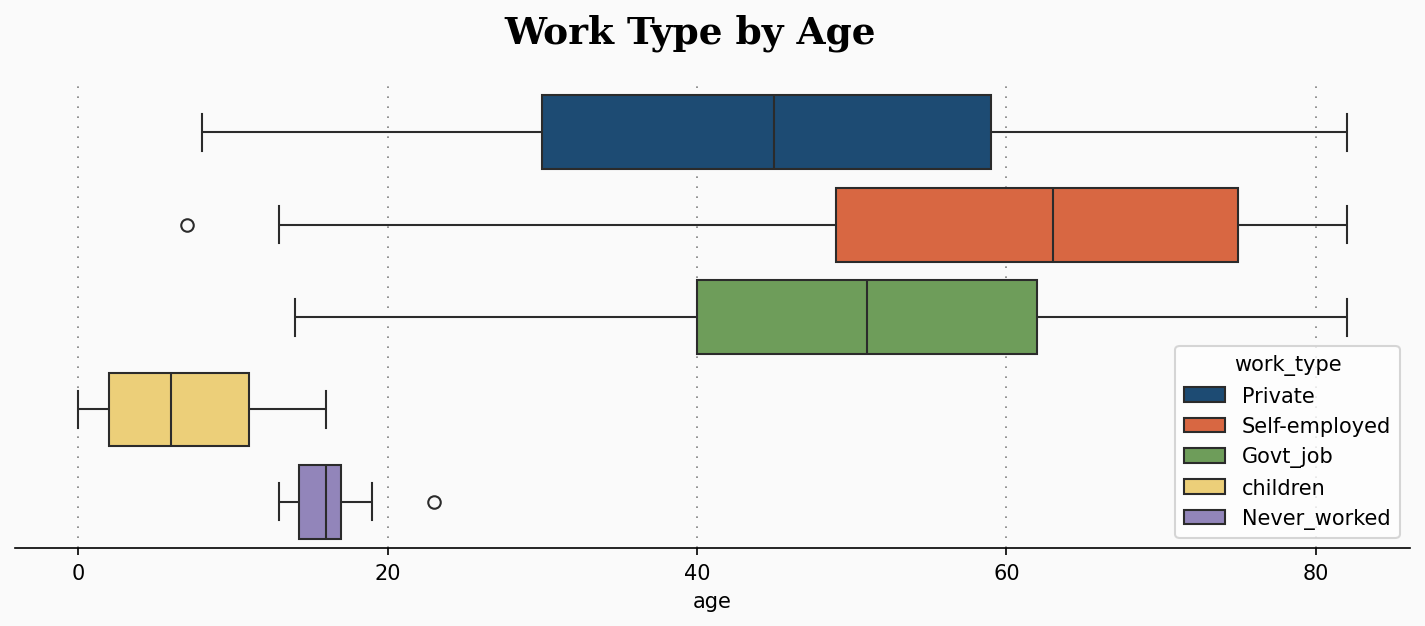

In [35]:
# box-plot or violin-plot for age_marriage distribution
fig = plt.figure(figsize=(12, 4), dpi=150, facecolor="#fafafa")
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.1, hspace=0.4)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#fafafa")
ax0.tick_params(axis="y", left=False)
ax0.get_yaxis().set_visible(False)

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

sns.boxplot(
    data=df,
    x="age",
    y="work_type",
    ax=ax0,
    palette=palette,
    hue="work_type",
    legend=True,
)

ax0.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5))

fig.suptitle(
    "Work Type by Age", fontsize=18, fontfamily="serif", fontweight="bold", y=1
)

Now we can see that `children` and `Never_worked` work types are close to each other. The only difference is that `children` are mostly between 0 and 16 years old, while `Never_worked` individuals are mainly between 16 and 20 years old.

Lastly, we have **Residence Type**. I don’t really believe this column will provide meaningful insights, but we need to check it anyway.

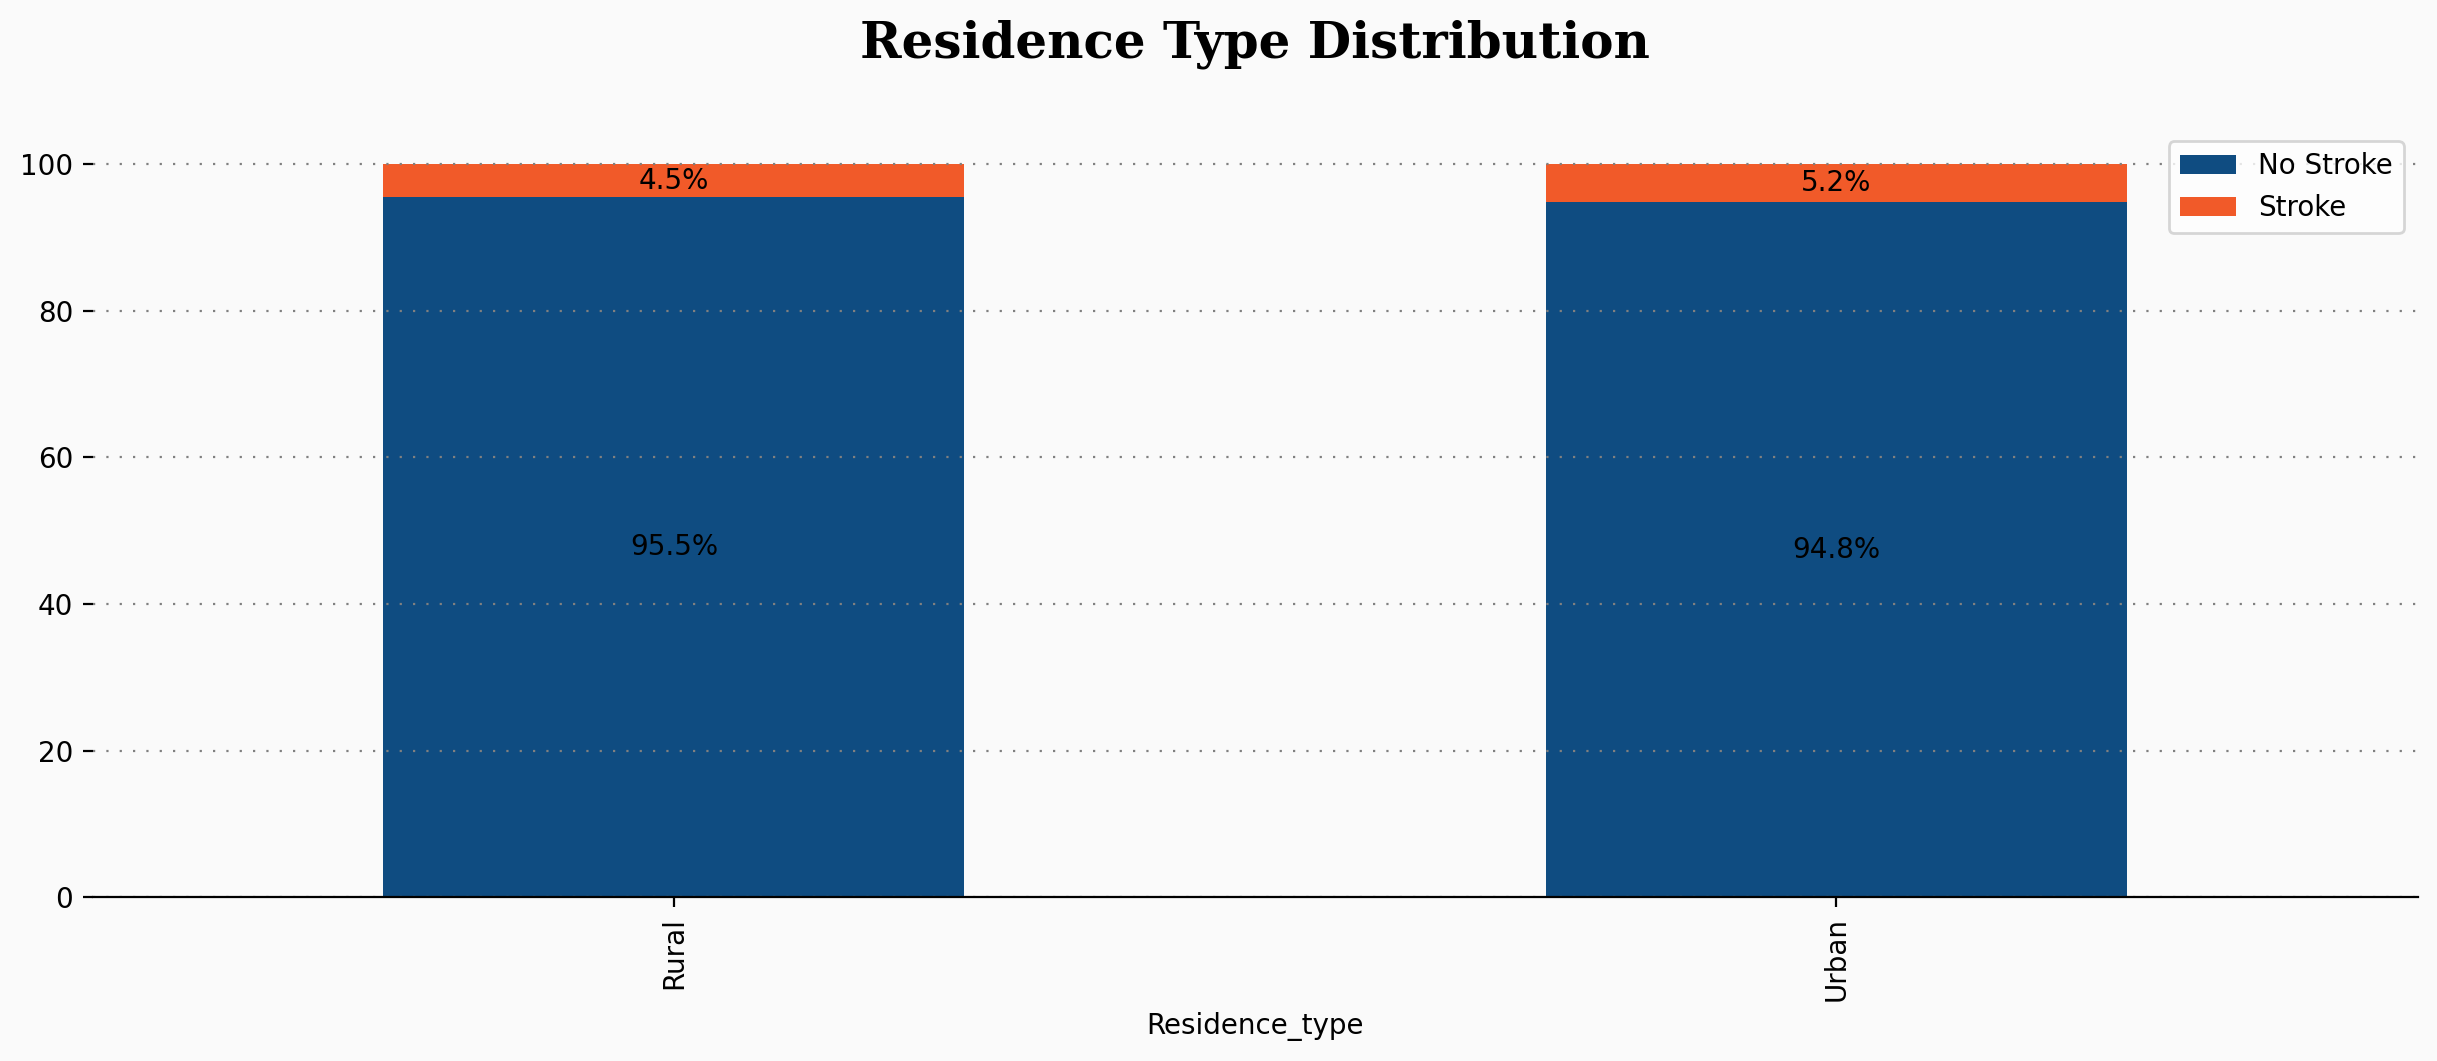

In [36]:
fig = plt.figure(figsize=(15, 5), dpi=200, facecolor="#fafafa")
gs = fig.add_gridspec(1, 5)
gs.update(wspace=0.30, hspace=0.5)

ax = fig.add_subplot(gs[0, :])
ax.set_facecolor("#fafafa")

ctab = pd.crosstab(df["Residence_type"], df["stroke"], normalize="index") * 100
ctab.plot(kind="bar", stacked=True, color=["#0f4c81", "#f15a29"], ax=ax)

ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5))
ax.legend(["No Stroke", "Stroke"])

for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

ax.set_title(
    "Residence Type Distribution",
    fontsize=18,
    fontfamily="serif",
    fontweight="bold",
    loc="center",
    pad=25,
)

plt.show()

No significant difference observed for this feature. The proportion of stroke is **4.5%** for `Rural` and **5.2%** for `Urban` residence types, indicating minimal impact on stroke prediction.

After analyzing all features and their impact on `stroke`, we can create a **correlation heatmap** to identify relationships between all features.

## Overview

<Axes: >

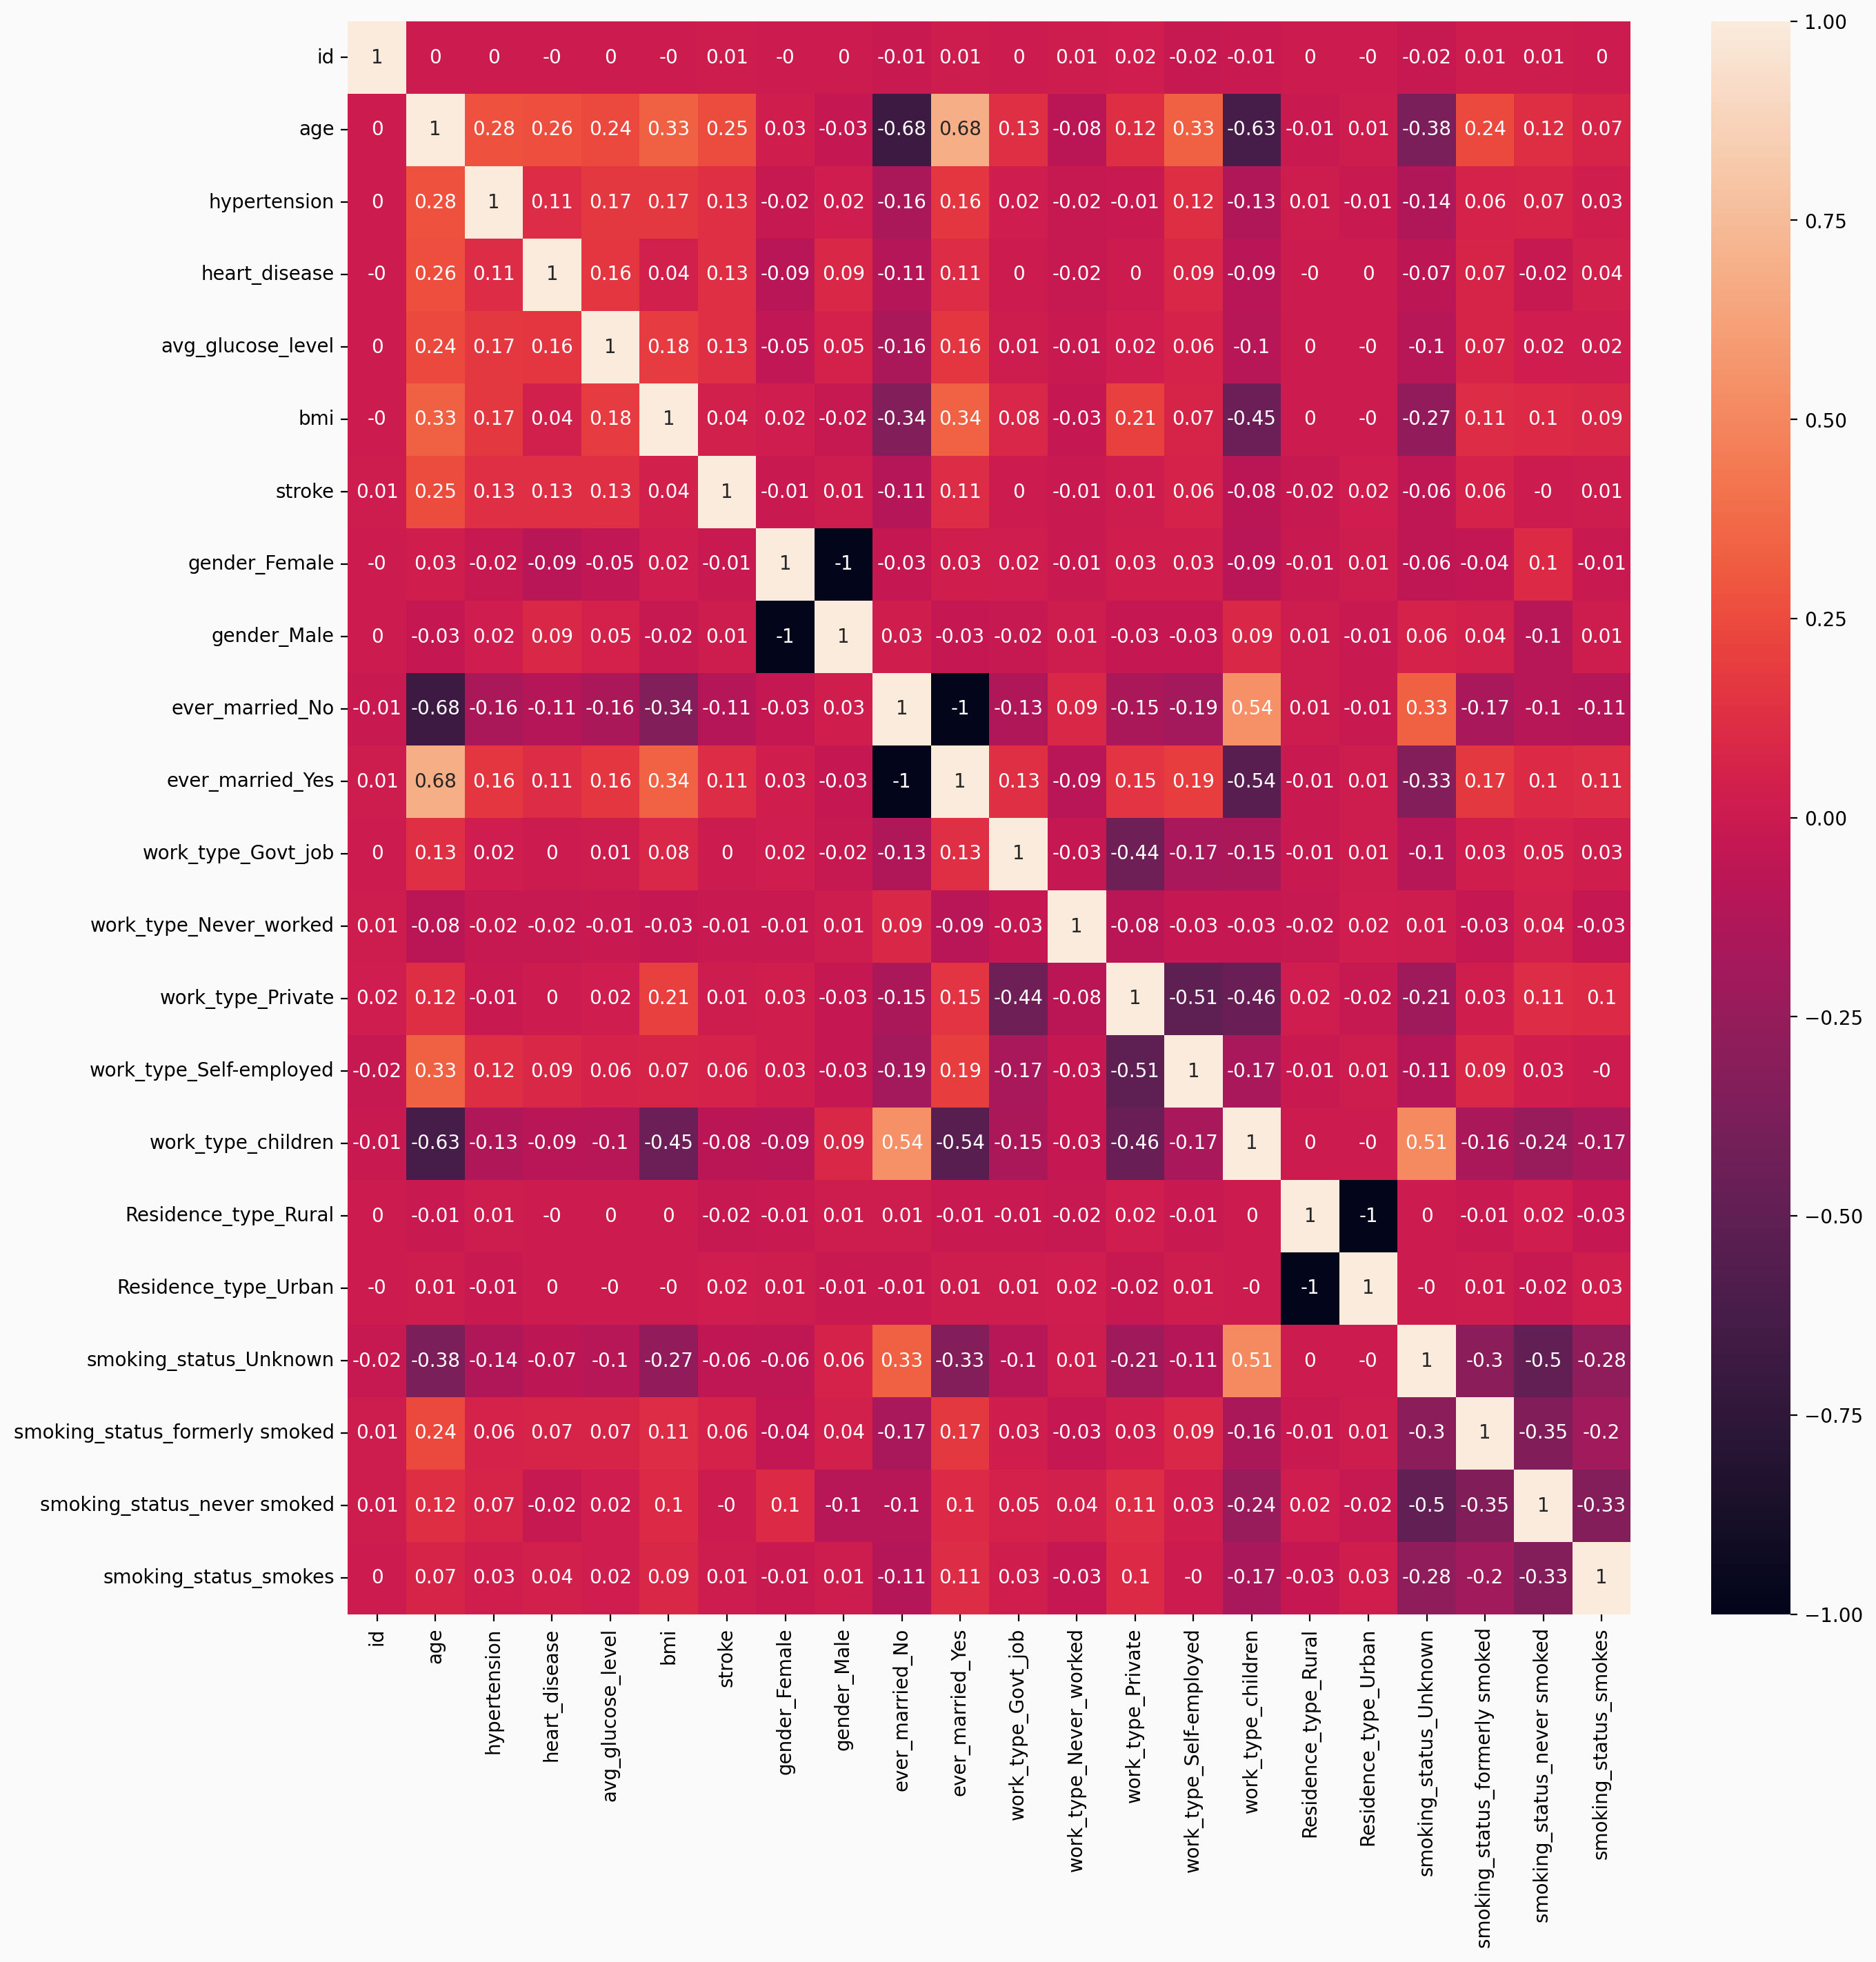

In [37]:
fig = plt.figure(dpi=200, figsize=(15, 15), facecolor="#fafafa")
sns.heatmap(data=ml_df.corr(numeric_only=True).apply(lambda x: x.round(2)), annot=True)

I created a **heatmap** using my previous `ml_df` with **dummy variables** to observe all possible correlations, not only between features but also between their values.

The first thing to note is that almost all features correlate with `age`, as we hypothesized. The logical exceptions are `gender` and `Residence_type`.

Unfortunately, we do not see strong correlations with `stroke`, except for the **numerical variables**. Now, we need to balance our data.  

I will also build my final model on two different DataFrames:  
1) The original one, with all features.  
2) An optimized one, with only a few selected features to make the model run faster.

## Model preparation

Plan for this part is to:
1) Divide data on **train** and **test**
2) Work on **disbalance**. 

In [38]:
X = ml_df.drop(["stroke", "id"], axis=1)
y = ml_df["stroke"]

Using `train_test_split` to separate data. I used 25% on test_size to train model on more data.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

**Important note**: Usually, people test their models both with and without SMOTE. However, my data shows a 95-to-5 proportion of no-stroke to stroke cases. That is why the use of SMOTE is necessary.

In this example, I used `SMOTENC`, because regular SMOTE has issues with **categorical variables**. It can create non-binary values such as 0.7 or 0.3, which do not make sense for categorical features.

In [40]:
from imblearn.over_sampling import SMOTENC

cat_col = [
    i
    for i, col in enumerate(X_train.columns)
    if col not in ["age", "bmi", "avg_glucose_level"]
]
smote_nc = SMOTENC(categorical_features=cat_col, random_state=42)

X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

In [41]:
print(
    f"X_train before: {len(X_train)}, y_train before: {len(y_train)}\nX_train now:    {len(X_train_smote)}, y_train now:    {len(y_train_smote)}"
)

X_train before: 3831, y_train before: 3831
X_train now:    7324, y_train now:    7324


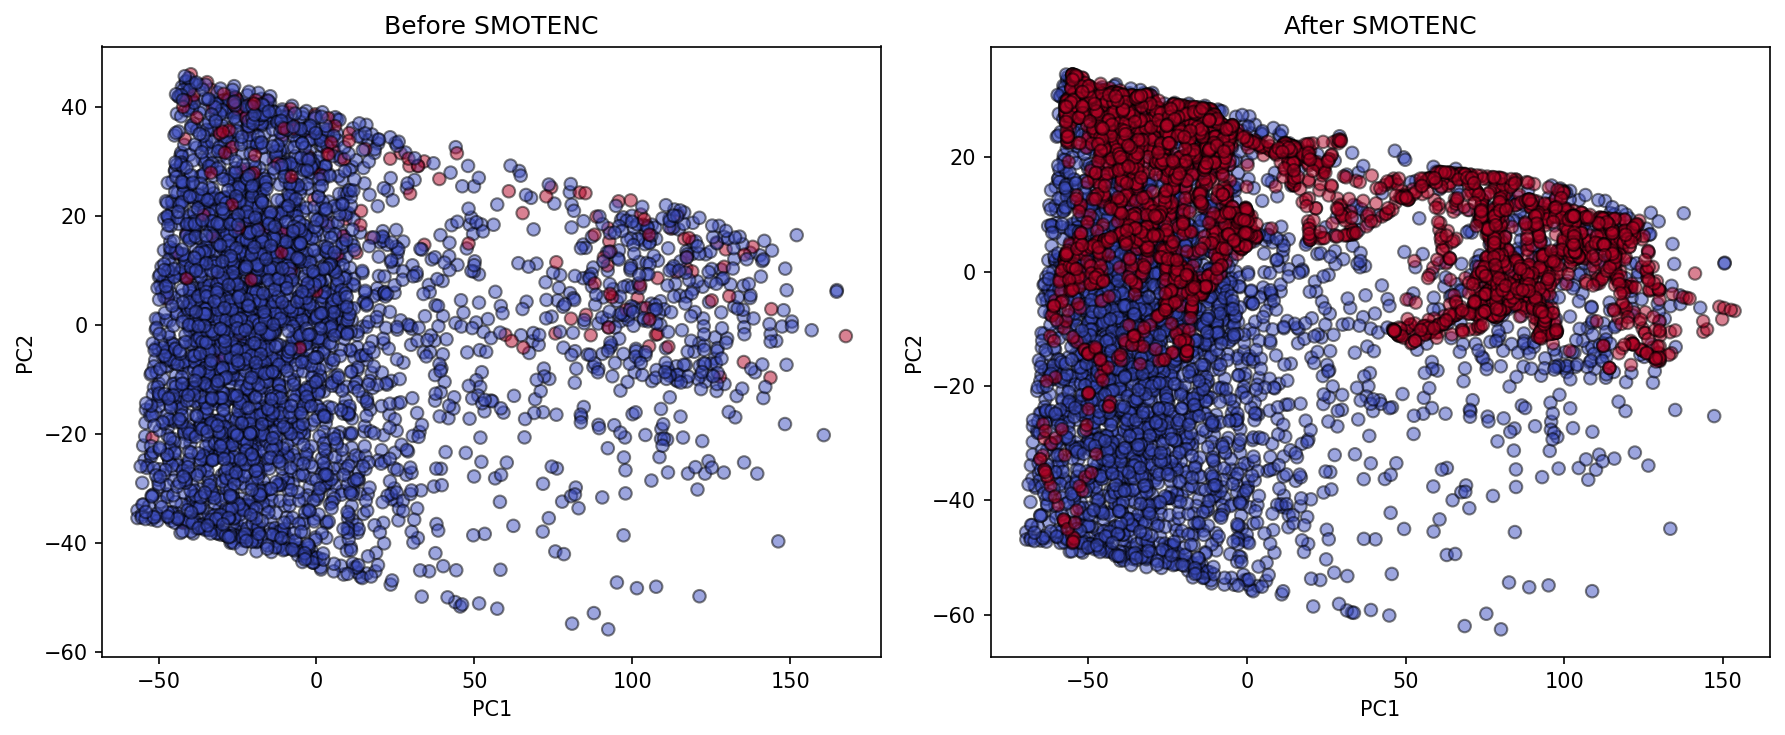

In [42]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2, random_state=42)
X_pca_before = pca.fit_transform(X_train)

X_pca_after = pca.fit_transform(X_train_smote)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

axes[0].scatter(
    X_pca_before[:, 0],
    X_pca_before[:, 1],
    c=y_train,
    cmap="coolwarm",
    alpha=0.5,
    edgecolor="k",
)
axes[0].set_title("Before SMOTENC")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

axes[1].scatter(
    X_pca_after[:, 0],
    X_pca_after[:, 1],
    c=y_train_smote,
    cmap="coolwarm",
    alpha=0.5,
    edgecolor="k",
)
axes[1].set_title("After SMOTENC")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()

As you can see, SMOTENC generated new data for classes to balance them.

Now I need to create pipelines of basic models to check their **cross-validation scores**. I will not use large models like XGBoost, CatBoost, or LightGBM, since there are not many samples to work with. I will also avoid **Deep Learning** models, as they are likely to overfit on such a small dataset.  

Therefore, I will test basic models such as **RandomForest, SVM, KNN, and LogisticRegression**.

## Creating basic Pipelines

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

rf_pipeline = Pipeline(
    steps=[("scale", StandardScaler()), ("RF", RandomForestClassifier(random_state=42))]
)
svm_pipeline = Pipeline(
    steps=[("scale", StandardScaler()), ("SVM", SVC(random_state=42))]
)
logreg_pipeline = Pipeline(
    steps=[("scale", StandardScaler()), ("LR", LogisticRegression(random_state=42))]
)
knn_pipeline = Pipeline(
    steps=[("scale", StandardScaler()), ("LR", KNeighborsClassifier())]
)

After creating the pipelines, we can now check the cross-validation scores using **recall as the main metric**, since our primary goal is **predicting the presence of stroke**.

I will use my custom **F2 metric** to give priority to *recall* while still maintaining *precision*.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

f2_scorer = make_scorer(fbeta_score, beta=2)

rf_cv = cross_val_score(
    rf_pipeline, X_train_smote, y_train_smote, cv=10, scoring=f2_scorer
)
svm_cv = cross_val_score(
    svm_pipeline, X_train_smote, y_train_smote, cv=10, scoring=f2_scorer
)
logreg_cv = cross_val_score(
    logreg_pipeline, X_train_smote, y_train_smote, cv=10, scoring=f2_scorer
)
knn_cv = cross_val_score(
    knn_pipeline, X_train_smote, y_train_smote, cv=10, scoring=f2_scorer
)

  File "C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                   

In [45]:
print("Mean f1 scores:")
print("Random Forest mean :", rf_cv.mean())
print("SVM mean :", svm_cv.mean())
print("Logistic Regression mean :", logreg_cv.mean())
print("KNeighbors mean :", knn_cv.mean())

Mean f1 scores:
Random Forest mean : 0.9577646666552895
SVM mean : 0.9253665779969541
Logistic Regression mean : 0.8319775063248492
KNeighbors mean : 0.950790791270855


`cross_val_score` showed that the best-performing model was **KNeighbors**. Let’s fit all these models to evaluate their performance on prediction.

In [46]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)


def model_fit(model):
    model.fit(X_train_smote, y_train_smote)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, preds))
    cmd.plot()
    plt.show()

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      1198
         1.0       0.19      0.16      0.17        80

    accuracy                           0.90      1278
   macro avg       0.57      0.56      0.56      1278
weighted avg       0.90      0.90      0.90      1278



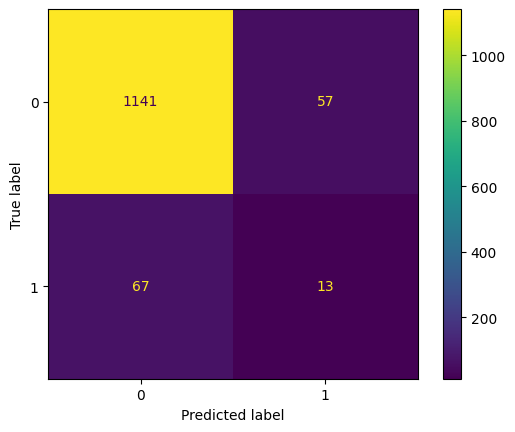

In [47]:
model_fit(rf_pipeline)

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      1198
         1.0       0.16      0.36      0.22        80

    accuracy                           0.84      1278
   macro avg       0.55      0.62      0.56      1278
weighted avg       0.90      0.84      0.87      1278



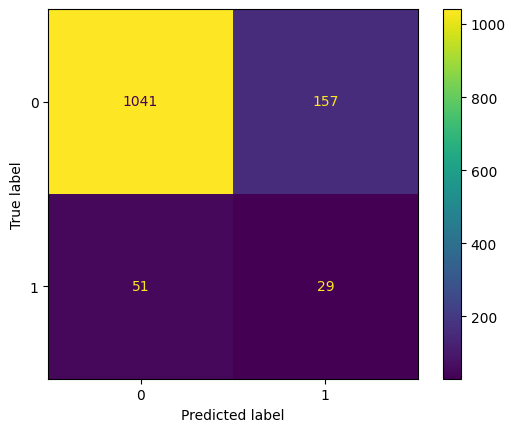

In [48]:
model_fit(svm_pipeline)

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88      1198
         1.0       0.16      0.55      0.25        80

    accuracy                           0.80      1278
   macro avg       0.56      0.68      0.57      1278
weighted avg       0.91      0.80      0.84      1278



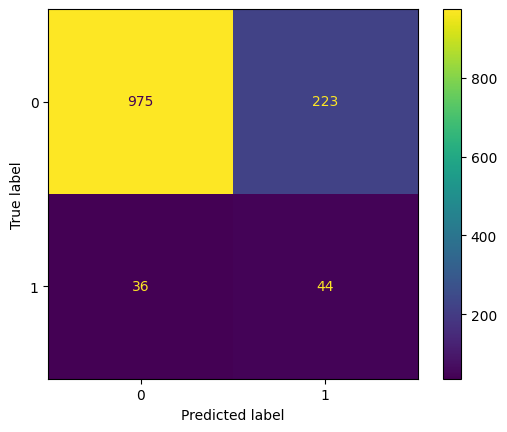

In [49]:
model_fit(logreg_pipeline)

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      1198
         1.0       0.14      0.25      0.18        80

    accuracy                           0.86      1278
   macro avg       0.55      0.57      0.55      1278
weighted avg       0.90      0.86      0.88      1278



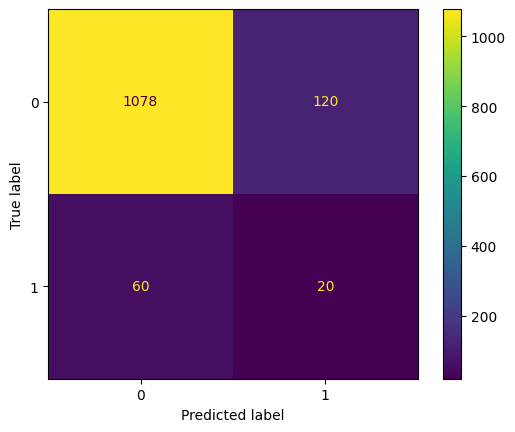

In [50]:
model_fit(knn_pipeline)

The best **recall** was achieved with **LogisticRegression**. In medical datasets, it is preferable to maximize recall, since it is better for the model to identify more sick people rather than healthy ones. However, we still need to find a balance between **recall** and **precision**.

Let’s try to **tune** all these models by finding their best **parameters**.

## Model tuning

In [51]:
from sklearn.model_selection import GridSearchCV

logreg = Pipeline(
    steps=[
        ("scale", StandardScaler()),
        ("LR", LogisticRegression(random_state=42, class_weight="balanced")),
    ]
)
logreg_param_grid = {
    "LR__C": [0.001, 0.005, 0.01, 0.1, 0.5],
    "LR__penalty": ["l1", "l2"],
    "LR__max_iter": [1000],
    "LR__solver": ["saga", "liblinear"],
}
logreg_grid = GridSearchCV(
    estimator=logreg, param_grid=logreg_param_grid, scoring=f2_scorer
)


svm = Pipeline(steps=[("scale", StandardScaler()), ("SVM", SVC(random_state=42))])
svm_param_grid = {
    "SVM__C": [0.01, 0.05, 0.1, 0.5],
    "SVM__kernel": ["linear", "poly", "rbf"],
}
svm_grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, scoring=f2_scorer)


rf = Pipeline(steps=[("RF", RandomForestClassifier(random_state=42))])
rf_param_grid = {
    "RF__n_estimators": [100, 200, 300],
    "RF__max_depth": [None, 10, 20],
    "RF__min_samples_split": [2, 5],
    "RF__min_samples_leaf": [1, 2],
}
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, scoring=f2_scorer)


knn = Pipeline(steps=[("scale", StandardScaler()), ("KNN", KNeighborsClassifier())])
knn_param_grid = {
    "KNN__n_neighbors": list(range(3, 10)),
    "KNN__weights": ["uniform", "distance"],
    "KNN__metric": ["euclidean", "manhattan", "minkowski"],
    "KNN__p": [1, 2],
}

knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, scoring=f2_scorer)

              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85      1198
         1.0       0.16      0.72      0.26        80

    accuracy                           0.75      1278
   macro avg       0.57      0.74      0.56      1278
weighted avg       0.93      0.75      0.81      1278



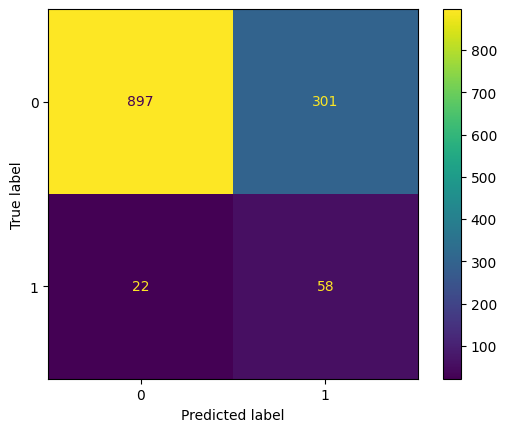

In [52]:
model_fit(logreg_grid)

In [53]:
logreg_grid.best_params_

{'LR__C': 0.01,
 'LR__max_iter': 1000,
 'LR__penalty': 'l1',
 'LR__solver': 'liblinear'}

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      1198
         1.0       0.14      0.45      0.22        80

    accuracy                           0.80      1278
   macro avg       0.55      0.64      0.55      1278
weighted avg       0.91      0.80      0.84      1278



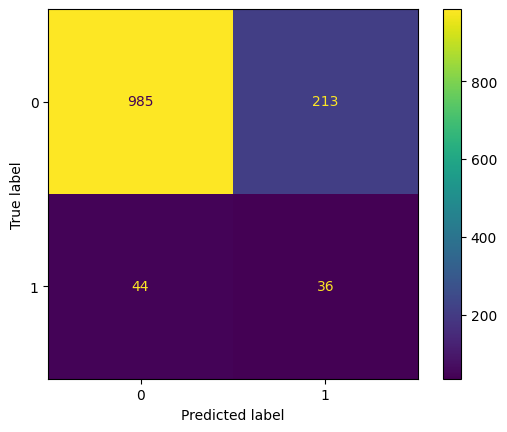

In [54]:
model_fit(svm_grid)

In [55]:
svm_grid.best_params_

{'SVM__C': 0.5, 'SVM__kernel': 'poly'}

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1198
         1.0       0.18      0.15      0.17        80

    accuracy                           0.91      1278
   macro avg       0.56      0.55      0.56      1278
weighted avg       0.90      0.91      0.90      1278



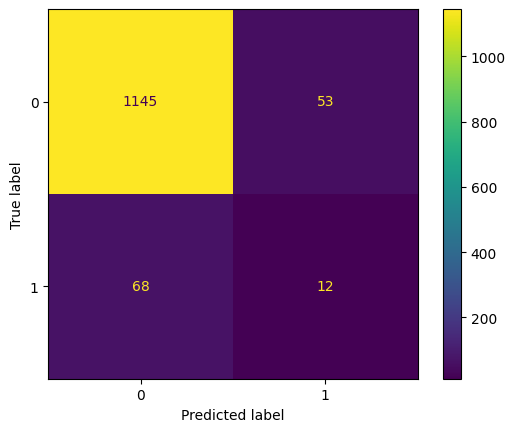

In [56]:
model_fit(rf_grid)

In [57]:
rf_grid.best_params_

{'RF__max_depth': None,
 'RF__min_samples_leaf': 1,
 'RF__min_samples_split': 2,
 'RF__n_estimators': 300}

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      1198
         1.0       0.18      0.28      0.21        80

    accuracy                           0.87      1278
   macro avg       0.56      0.59      0.57      1278
weighted avg       0.90      0.87      0.89      1278



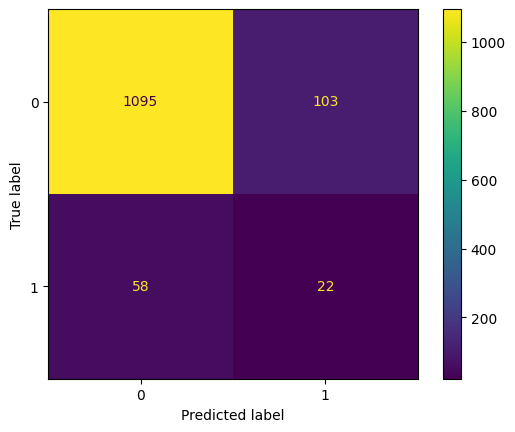

In [58]:
model_fit(knn_grid)

In [59]:
knn_grid.best_params_

{'KNN__metric': 'manhattan',
 'KNN__n_neighbors': 4,
 'KNN__p': 1,
 'KNN__weights': 'distance'}

Overall, we can see that **SVC** and **LogisticRegression** performed best in terms of *recall*. They also showed good results in *accuracy* and *precision*. However, **RandomForestClassifier** and **KNeighbors** achieved higher *accuracy*.

Since we prioritized *recall*, we will keep only **SVC** and **LogisticRegression**.

## Feature selection for Optimization

Here, I chose the best correlating features.

In [60]:
X_train_smote = X_train_smote[
    ["age", "hypertension", "heart_disease", "avg_glucose_level"]
]
X_test = X_test[["age", "hypertension", "heart_disease", "avg_glucose_level"]]

              precision    recall  f1-score   support

         0.0       0.98      0.68      0.81      1198
         1.0       0.15      0.82      0.25        80

    accuracy                           0.69      1278
   macro avg       0.57      0.75      0.53      1278
weighted avg       0.93      0.69      0.77      1278



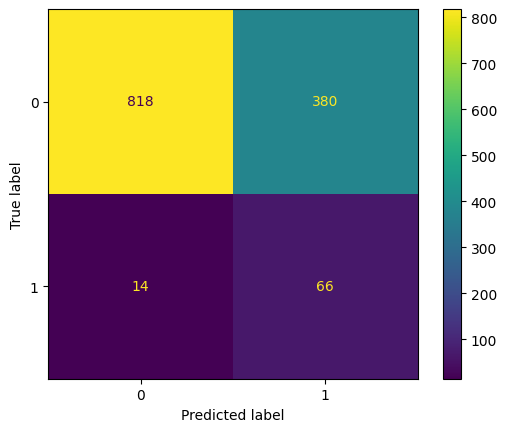

In [61]:
model_fit(logreg_grid)

In [62]:
logreg_grid.best_params_

{'LR__C': 0.005,
 'LR__max_iter': 1000,
 'LR__penalty': 'l1',
 'LR__solver': 'liblinear'}

              precision    recall  f1-score   support

         0.0       0.98      0.63      0.77      1198
         1.0       0.13      0.80      0.22        80

    accuracy                           0.64      1278
   macro avg       0.55      0.72      0.49      1278
weighted avg       0.93      0.64      0.73      1278



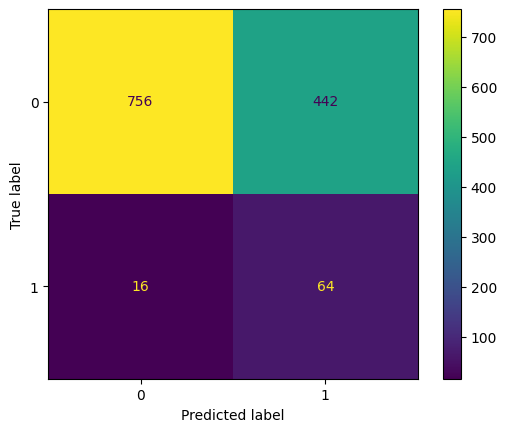

In [63]:
model_fit(svm_grid)

In [64]:
svm_grid.best_params_

{'SVM__C': 0.05, 'SVM__kernel': 'poly'}

As we can see, **LogisticRegression** performs better even on shortened dataframe. Now, we need to find the best `threshold` for our *logreg_grid*.

ROC-AUC: 0.8329924874791319


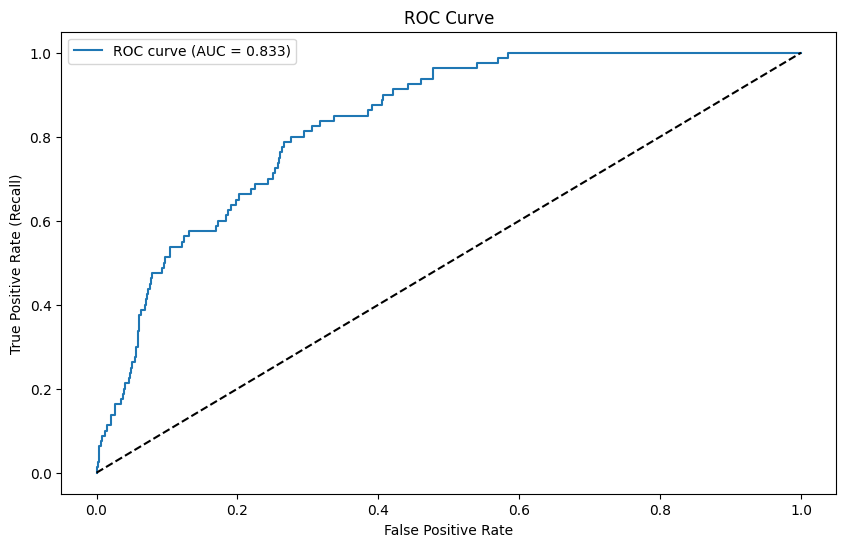

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = logreg_grid.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [66]:
# y_proba = logreg_grid.predict_proba(X_test)[:, 1]
threshold = 0.6
y_pred_custom = (y_proba >= threshold).astype(int)

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      1198
         1.0       0.17      0.66      0.27        80

    accuracy                           0.78      1278
   macro avg       0.57      0.72      0.57      1278
weighted avg       0.92      0.78      0.83      1278



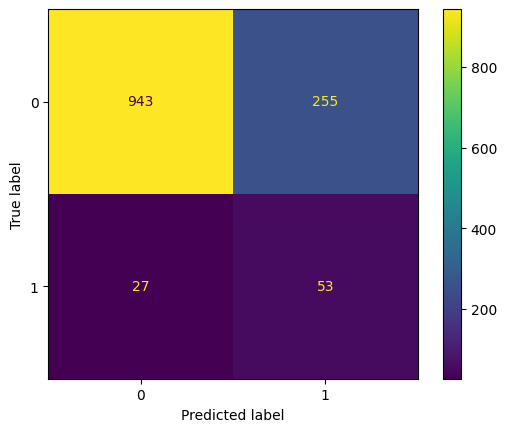

In [67]:
print(classification_report(y_test, y_pred_custom))
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_custom))
cmd.plot()
plt.show()

In [68]:
# y_proba = logreg_grid.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_custom = (y_proba >= threshold).astype(int)

              precision    recall  f1-score   support

         0.0       0.99      0.58      0.73      1198
         1.0       0.13      0.90      0.22        80

    accuracy                           0.60      1278
   macro avg       0.56      0.74      0.48      1278
weighted avg       0.93      0.60      0.70      1278



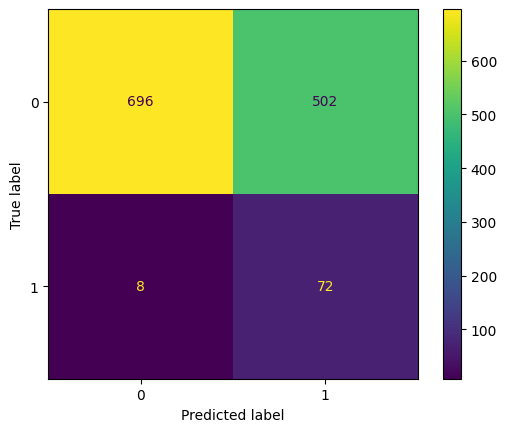

In [69]:
print(classification_report(y_test, y_pred_custom))
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_custom))
cmd.plot()
plt.show()

We can see that a **higher threshold** improves *accuracy* due to the **class imbalance** in `X_test`. However, a **lower threshold** increases *recall* for stroke prediction. In my opinion, we should keep the standard `threshold = 0.5`, since we do not want to create too many **false alarms** while still making accurate predictions for `stroke == 1`.

In [70]:
# y_proba = logreg_grid.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred_custom = (y_proba >= threshold).astype(int)

              precision    recall  f1-score   support

         0.0       0.98      0.68      0.81      1198
         1.0       0.15      0.82      0.25        80

    accuracy                           0.69      1278
   macro avg       0.57      0.75      0.53      1278
weighted avg       0.93      0.69      0.77      1278



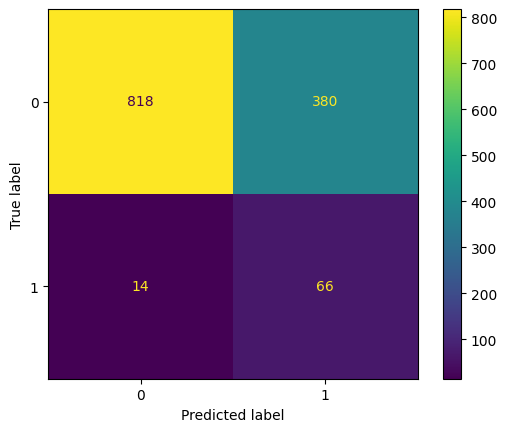

In [71]:
print(classification_report(y_test, y_pred_custom))
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_custom))
cmd.plot()
plt.show()

In conclusion, we confirmed our hypothesis that the data is not sufficiently informative to predict strokes with high accuracy. Nevertheless, the results are still meaningful.

**This model could serve as a filter for patients.**

For instance, if a person is uncertain whether to visit a doctor to assess the risk of stroke or to ignore potential symptoms, they could use this model to make a quick decision. Since the model correctly identifies many true cases, it may act as a valuable preliminary screening tool.

Moreover, the model is highly user-friendly, requiring only four input parameters: **age, hypertension, heart disease, and average glucose level.**